In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from collections import Counter
from itertools import product
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df2=pd.read_csv('teacher_performance_evaluation.csv')
df3=pd.read_csv('smart_school_app_competitors.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
from mimesis import Person
person = Person('en')

# function to create names to exact rows
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name

names = fake_names(1000)

df_name = pd.DataFrame(list(zip(names)),columns = ['Name'])

In [5]:
df_name.head()

,Name
0,Troy
1,Raina
2,Tiffaney
3,Kina
4,Celsa


In [6]:
df1 = pd.concat([df_name, df], axis=1).reindex(df.index)
df1.head()

,Name,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Troy,female,group B,bachelor's degree,standard,none,72,72,74
1,Raina,female,group C,some college,standard,completed,69,90,88
2,Tiffaney,female,group B,master's degree,standard,none,90,95,93
3,Kina,male,group A,associate's degree,free/reduced,none,47,57,44
4,Celsa,male,group C,some college,standard,none,76,78,75


In [7]:
#create new column Total_score
df1['Total_Performance_Score'] = df1[['math score', 'reading score', 'writing score']].mean(axis=1)
df1

,Name,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Performance_Score
0,Troy,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,Raina,female,group C,some college,standard,completed,69,90,88,82.333333
2,Tiffaney,female,group B,master's degree,standard,none,90,95,93,92.666667
3,Kina,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,Celsa,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,Kyoko,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,Alonzo,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,Pierre,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,Rebbecca,female,group D,some college,standard,completed,68,78,77,74.333333


In [8]:
#create new column performance level
# Function to determine performance level
def performance_level(score):
    if score > 80:
        return 'high'
    elif score > 60:
        return 'medium'
    else:
        return 'low'

# Apply the function to create a new column
df1['Performance_Level'] = df1['Total_Performance_Score'].apply(performance_level)
df1=pd.DataFrame(df1)
df1


,Name,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Performance_Score,Performance_Level
0,Troy,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,medium
1,Raina,female,group C,some college,standard,completed,69,90,88,82.333333,high
2,Tiffaney,female,group B,master's degree,standard,none,90,95,93,92.666667,high
3,Kina,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,low
4,Celsa,male,group C,some college,standard,none,76,78,75,76.333333,medium
...,...,...,...,...,...,...,...,...,...,...,...
995,Kyoko,female,group E,master's degree,standard,completed,88,99,95,94.000000,high
996,Alonzo,male,group C,high school,free/reduced,none,62,55,55,57.333333,low
997,Pierre,female,group C,high school,free/reduced,completed,59,71,65,65.000000,medium
998,Rebbecca,female,group D,some college,standard,completed,68,78,77,74.333333,medium


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         1000 non-null   object 
 1   gender                       1000 non-null   object 
 2   race/ethnicity               1000 non-null   object 
 3   parental level of education  1000 non-null   object 
 4   lunch                        1000 non-null   object 
 5   test preparation course      1000 non-null   object 
 6   math score                   1000 non-null   int64  
 7   reading score                1000 non-null   int64  
 8   writing score                1000 non-null   int64  
 9   Total_Performance_Score      1000 non-null   float64
 10  Performance_Level            1000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 86.1+ KB


In [10]:
df1.columns

Index(['Name', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score', 'Total_Performance_Score', 'Performance_Level'],
      dtype='object')

EDA and Preprocessing for Student Performance

In [12]:
df1['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [13]:
df1['Performance_Level'].value_counts()

Performance_Level
medium    513
low       293
high      194
Name: count, dtype: int64

In [14]:
df1['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [15]:
df1['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [16]:
df1['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [17]:
df1['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

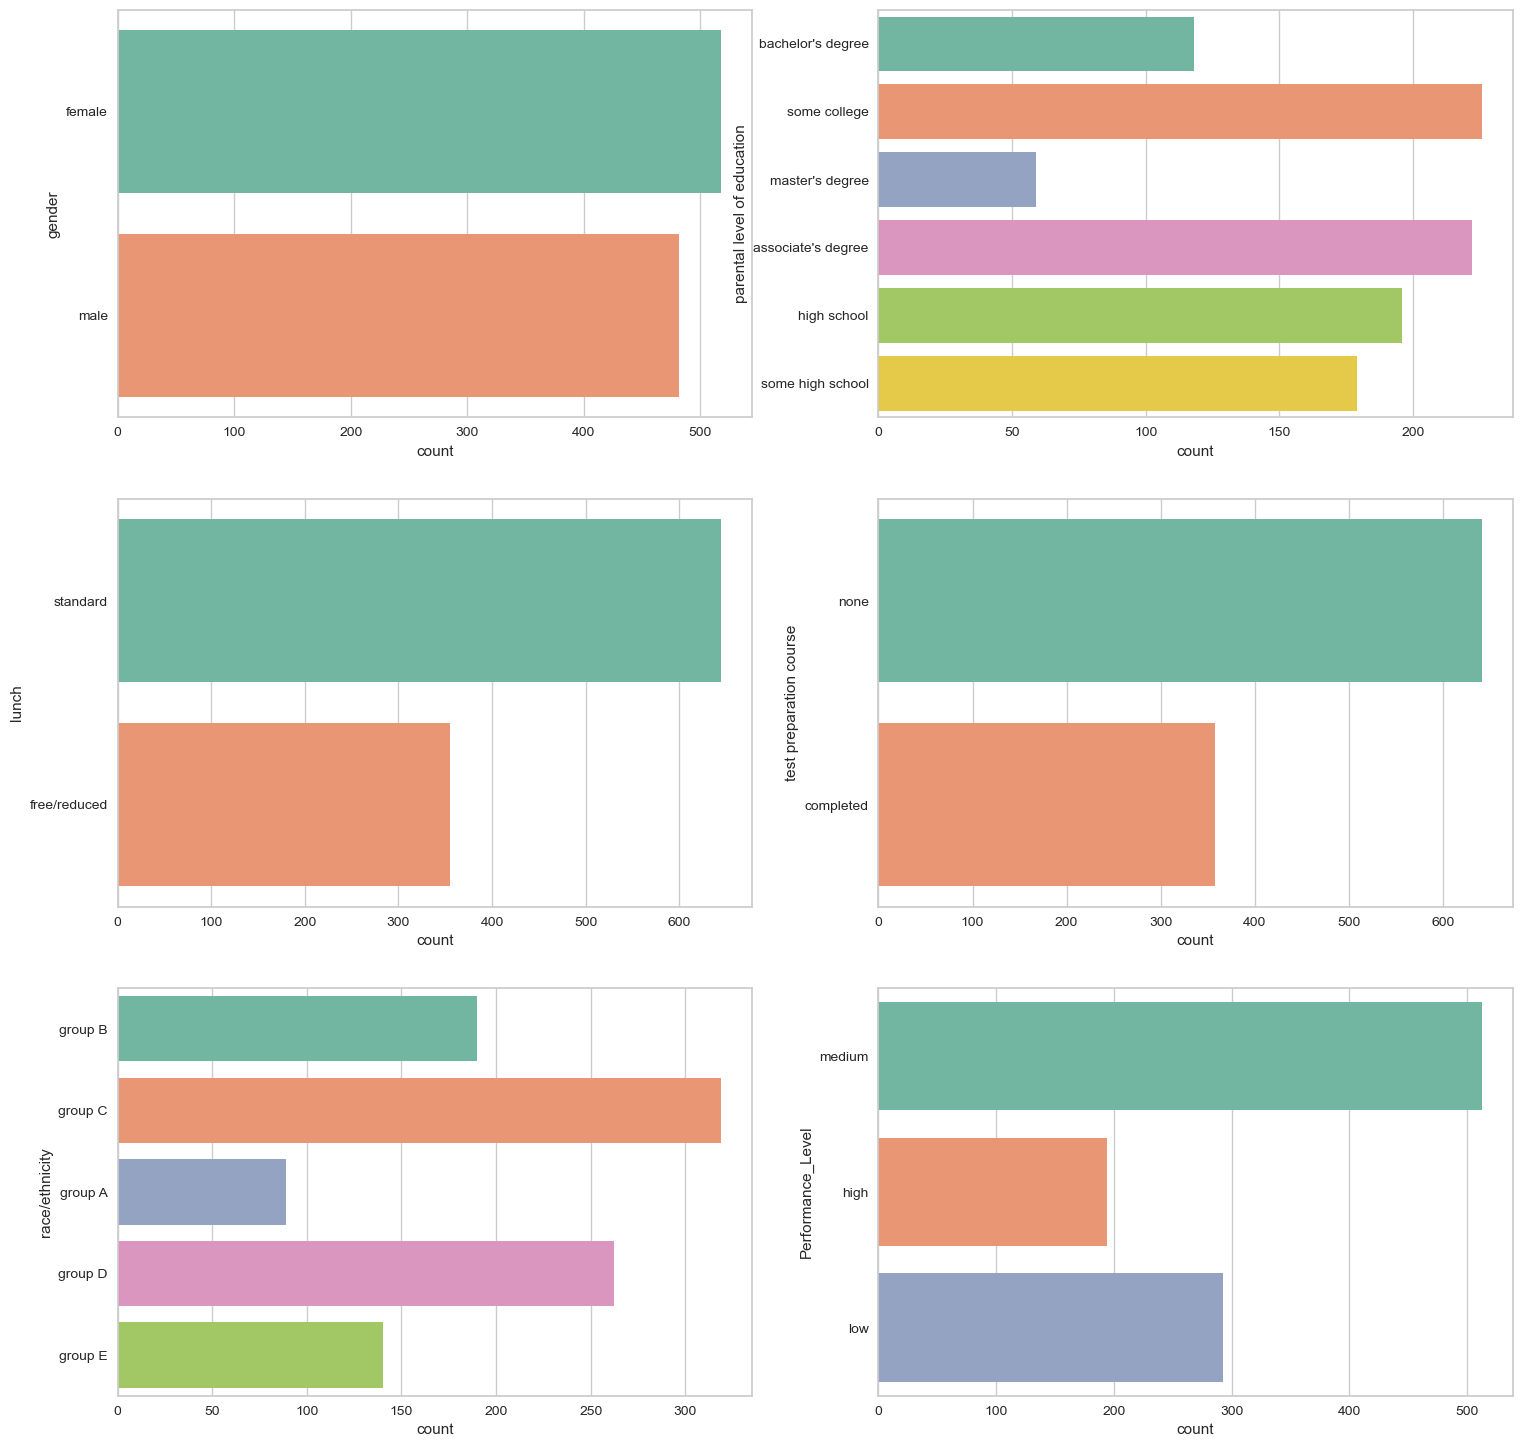

In [18]:
#univariate analysis of categorical variables
fig, ax = plt.subplots(3, 2, figsize = (18,18))
_=sns.countplot(df1['gender'], ax=ax[0,0], palette='Set2')
_=sns.countplot(df1['parental level of education'], ax=ax[0,1], palette='Set2')
_=sns.countplot(df1['lunch'], ax=ax[1,0], palette='Set2')
_=sns.countplot(df1['test preparation course'], ax=ax[1,1], palette='Set2')
_=sns.countplot(df1['race/ethnicity'], ax=ax[2,0], palette='Set2')
_=sns.countplot(df1['Performance_Level'], ax=ax[2,1], palette='Set2')

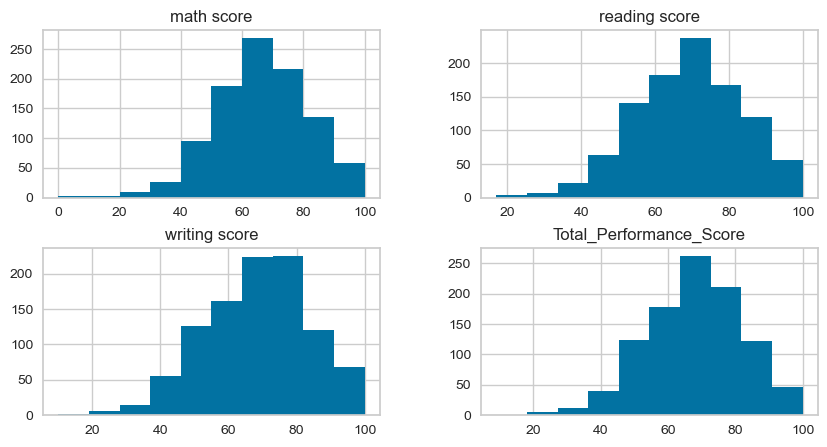

In [19]:
#univariate analysis of numerical columns - continuous variables -
df1[['math score','reading score','writing score','Total_Performance_Score']].hist(figsize=(10,5))
plt.show()

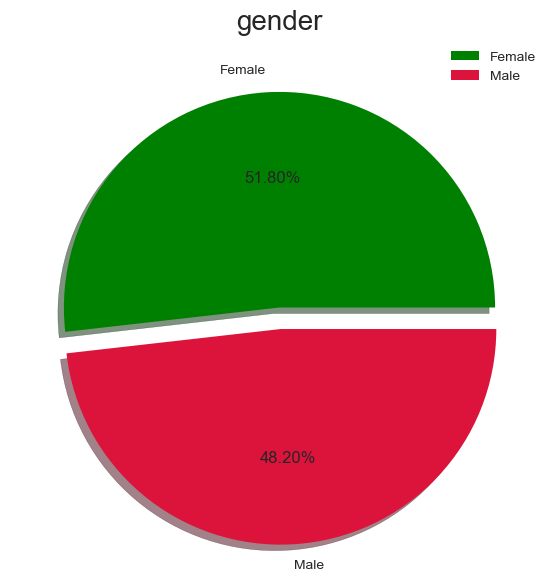

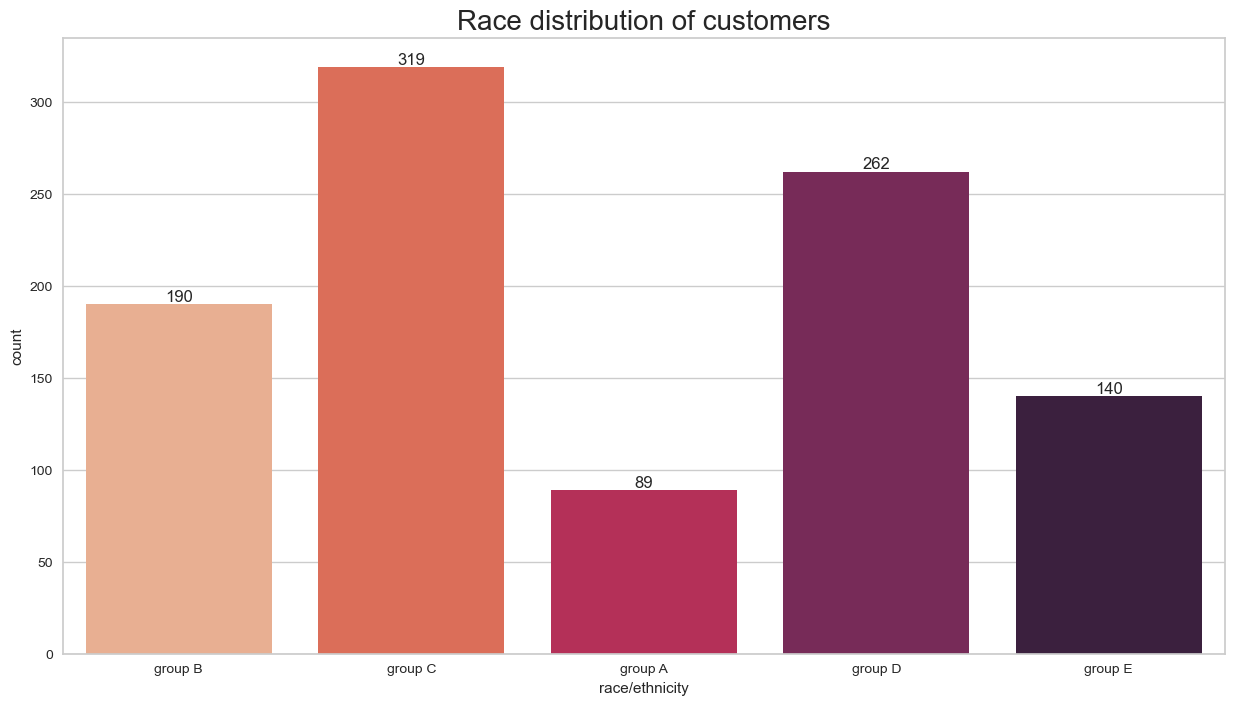

In [20]:
# Demographic segmentation using 'race/ethnicity' & 'gender'

# Gender: we infer that there are more female customers than male
labels = ['Female', 'Male']
size =df1['gender'].value_counts()
colors = ['green', 'crimson']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (15, 8)
data3 = sns.countplot(x=df1['race/ethnicity'], palette = 'rocket_r')
# Add bar labels
for container in data3.containers:
    data3.bar_label(container)
plt.title('Race distribution of customers', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Test Preparation vs Total_Performance_Score')

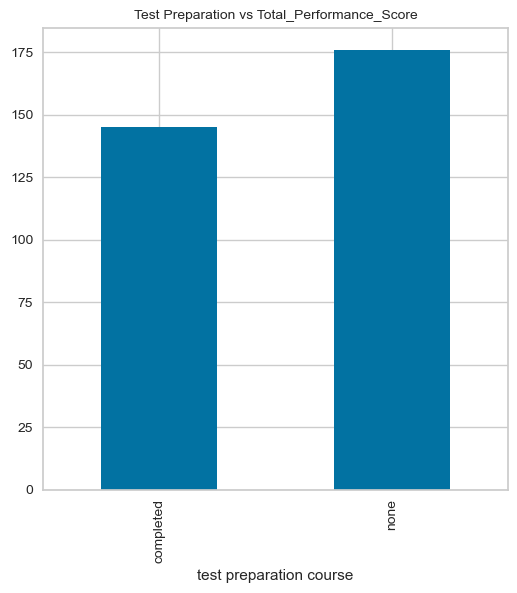

In [21]:
plt.figure(figsize=(6, 6))
prep_score = df1.groupby('test preparation course')['Total_Performance_Score'].nunique().plot(kind='bar')
plt.title("Test Preparation vs Total_Performance_Score", fontsize = 10)

Text(0.5, 1.0, 'Performance_Level vs Total_Performance_Score')

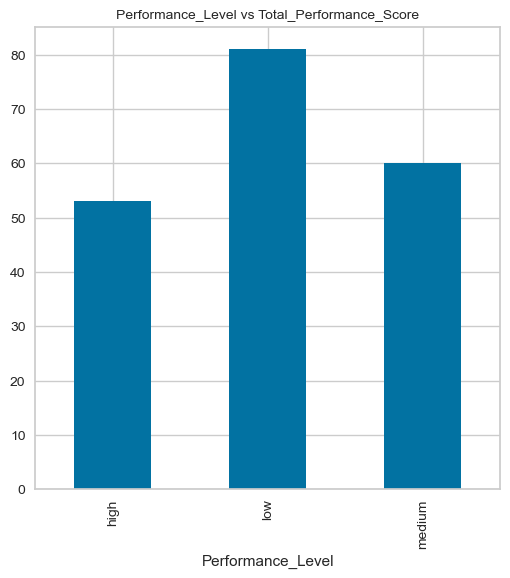

In [22]:
plt.figure(figsize=(6, 6))
prep_score = df1.groupby('Performance_Level')['Total_Performance_Score'].nunique().plot(kind='bar')
plt.title("Performance_Level vs Total_Performance_Score", fontsize = 10)

Text(0.5, 1.0, 'Parental level of education vs Total_Performance_Score')

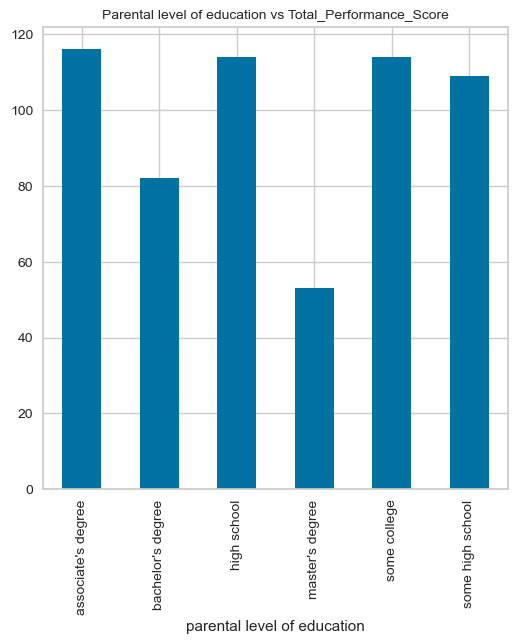

In [23]:
plt.figure(figsize=(6, 6))
prep_score = df1.groupby('parental level of education')['Total_Performance_Score'].nunique().plot(kind='bar')
plt.title("Parental level of education vs Total_Performance_Score", fontsize = 10)

In [24]:
print(f"Duplicates: {df1.duplicated().sum()}")
duplicate = df1[df1.duplicated()]
duplicate

Duplicates: 0


,Name,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Performance_Score,Performance_Level


In [25]:
df1[['math score','reading score','writing score','Total_Performance_Score']].describe()

,math score,reading score,writing score,Total_Performance_Score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [26]:
# Name column don't add any value. 
df1.drop(['Name'], axis=1, inplace=True);

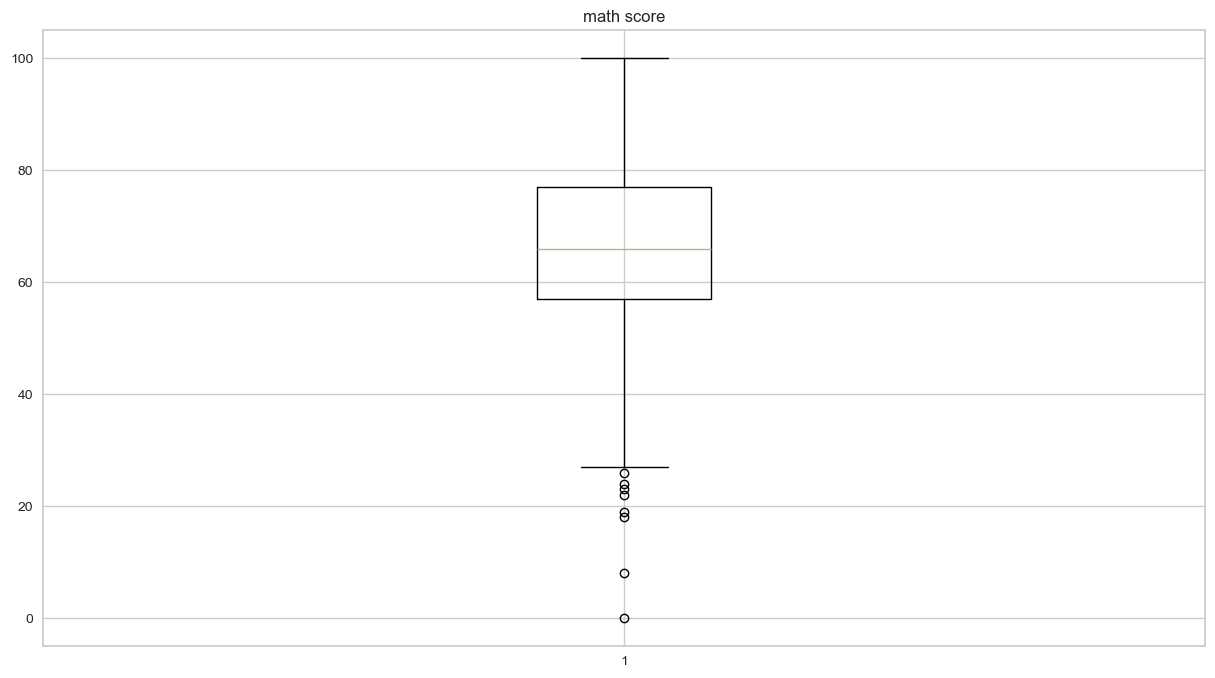

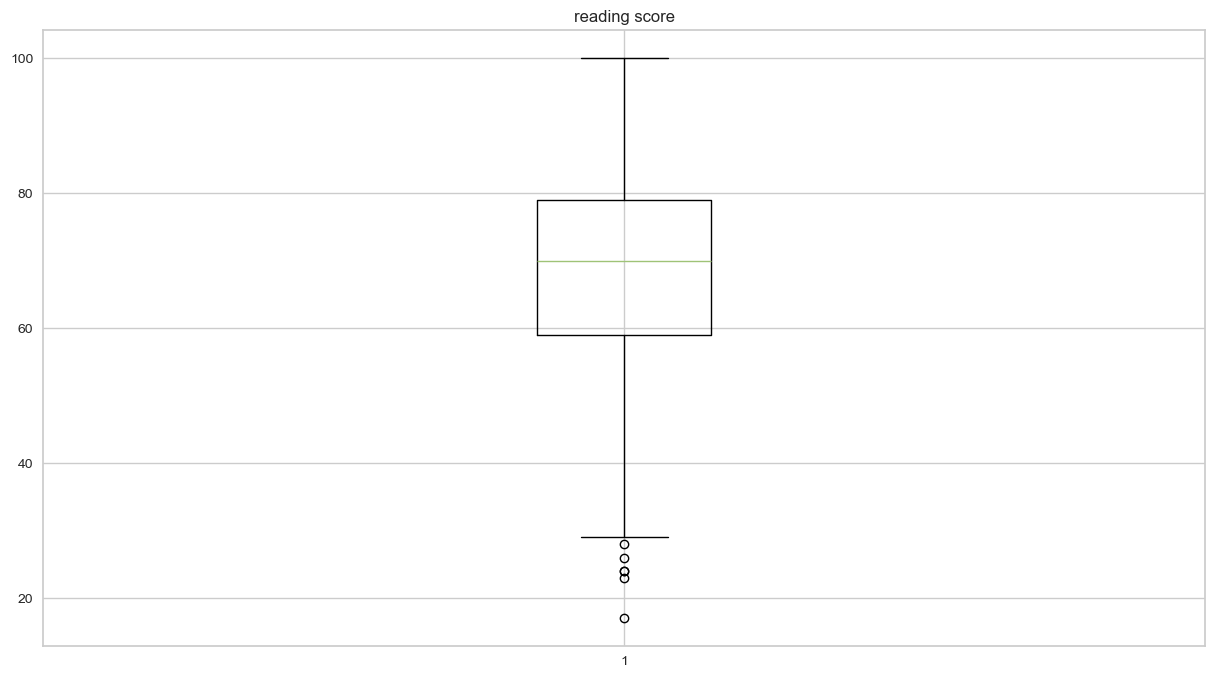

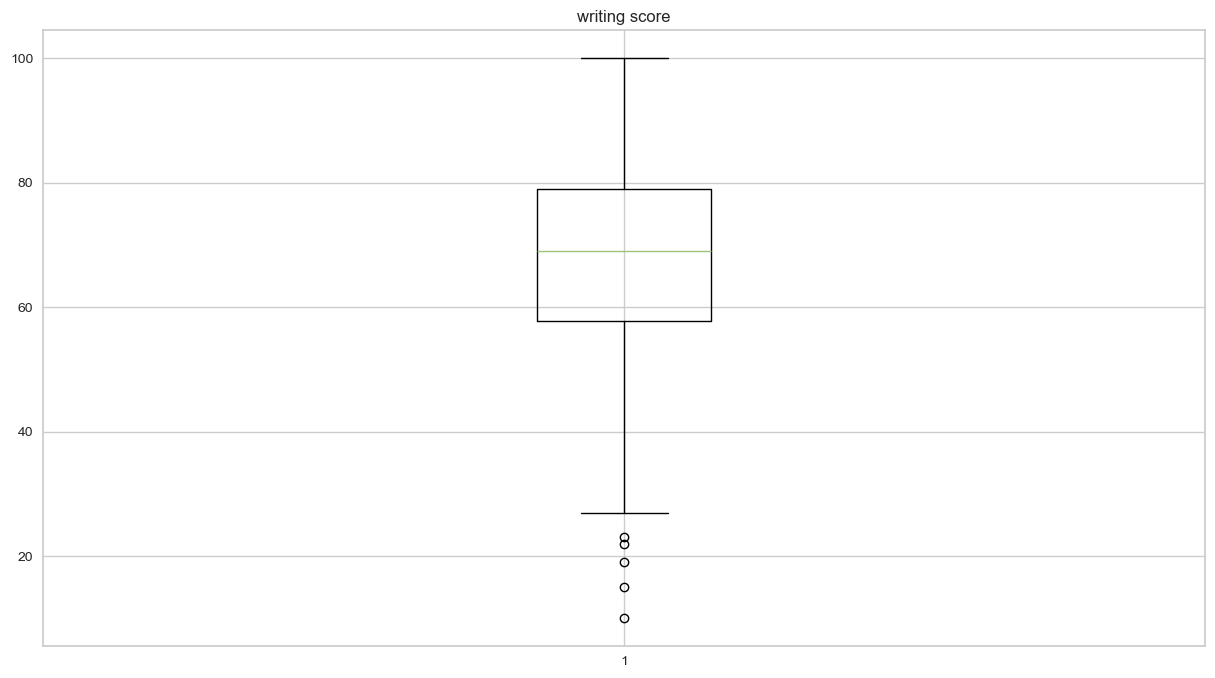

In [27]:
#Boxplot for numerical column
for i in ['math score','reading score','writing score']:
    plt.figure()
    plt.boxplot(df1[i])
    plt.title(i)

In [28]:
#change the column names
 
df1.rename(columns={'math score':'math_score','reading score':'reading_score','writing score':'writing_score'},inplace=True)

In [29]:

#To treat outliers
Q1 = df1.math_score.quantile(0.25)
Q3 = df1.math_score.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

27.0 107.0 20.0


In [30]:
df1.loc[df1['math_score']>max_limit,'math_score']=np.median(df1.math_score)	
df1.loc[df1['math_score']<min_limit,'math_score']=np.median(df1.math_score)

In [31]:
Q1 = df1.reading_score.quantile(0.25)
Q3 = df1.reading_score.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

29.0 109.0 20.0


In [32]:
df1.loc[df1['reading_score']>max_limit,'reading_score']=np.median(df1.reading_score)	
df1.loc[df1['reading_score']<min_limit,'reading_score']=np.median(df1.reading_score)

In [33]:
Q1 = df1.writing_score.quantile(0.25)
Q3 = df1.writing_score.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

25.875 110.875 21.25


In [34]:
df1.loc[df1['writing_score']>max_limit,'writing_score']=np.median(df1.writing_score)	
df1.loc[df1['writing_score']<min_limit,'writing_score']=np.median(df1.writing_score)

In [35]:
#Label Encoding 
le=LabelEncoder()
df1['gender']=le.fit_transform(df1['gender'])
df1['race/ethnicity']=le.fit_transform(df1['race/ethnicity'])
df1['parental level of education']=le.fit_transform(df1['parental level of education'])
df1['lunch']=le.fit_transform(df1['lunch'])
df1['test preparation course']=le.fit_transform(df1['test preparation course'])
df1['Performance_Level']=le.fit_transform(df1['Performance_Level'])

In [36]:
df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,Total_Performance_Score,Performance_Level
0,0,1,1,1,1,72,72,74,72.666667,2
1,0,2,4,1,0,69,90,88,82.333333,0
2,0,1,3,1,1,90,95,93,92.666667,0
3,1,0,0,0,1,47,57,44,49.333333,1
4,1,2,4,1,1,76,78,75,76.333333,2
...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,94.000000,0
996,1,2,2,0,1,62,55,55,57.333333,1
997,0,2,2,0,0,59,71,65,65.000000,2
998,0,3,4,1,0,68,78,77,74.333333,2


To predict Student Preferances about the course recommendation

In [38]:
#Splitting the data into independent and dependent variables
X=df1.drop(['test preparation course','lunch','gender','Performance_Level'],axis=1)
y=df1['test preparation course']

In [39]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler() 
numeric_features = []

for col in X.columns:
    if(X[col].dtype == "float" ):
        numeric_features.append(col)

X[numeric_features] = scaler.fit_transform(X[numeric_features])
X

,race/ethnicity,parental level of education,math_score,reading_score,writing_score,Total_Performance_Score
0,1,1,72,72,74,0.699634
1,2,4,69,90,88,0.805861
2,1,3,90,95,93,0.919414
3,0,0,47,57,44,0.443223
4,2,4,76,78,75,0.739927
...,...,...,...,...,...,...
995,4,3,88,99,95,0.934066
996,2,2,62,55,55,0.531136
997,2,2,59,71,65,0.615385
998,3,4,68,78,77,0.717949


[0.10193916 0.09906719 0.18741921 0.19249646 0.2201596  0.19891838]


<Axes: >

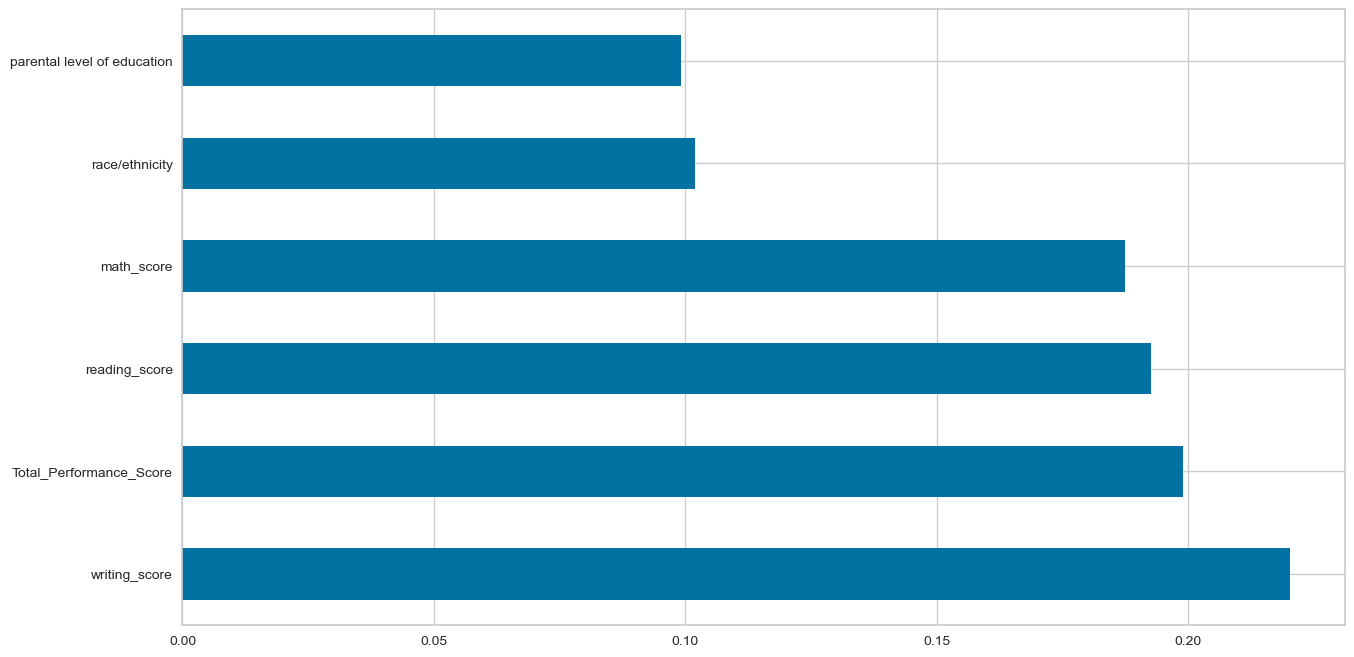

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
#use inbuilt class feature_importances of tree
print(model.feature_importances_)
#plot graph of feature importance
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [41]:
#splitting the data into train ,test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.2 )

In [42]:
print(X_train.shape),print(y_train.shape)
print(X_test.shape),print(y_test.shape)

(800, 6)
(800,)
(200, 6)
(200,)


(None, None)

Modeling and Evaluation

In [44]:
#Naive Bayes, Support Vector Machines (SVM), Random Forest,KNN,Linear Support Vector Machine,Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.73      0.34      0.47        79
           1       0.68      0.92      0.78       121

    accuracy                           0.69       200
   macro avg       0.71      0.63      0.62       200
weighted avg       0.70      0.69      0.66       200



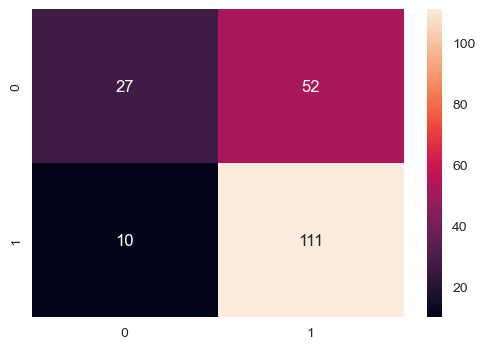

In [45]:
#1.using LogisticRegression
log_reg=LogisticRegression()
model = log_reg.fit(X_train,y_train)
log_pred = model.predict(X_test)
cm=confusion_matrix(y_test,log_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.57      0.32      0.41        79
           1       0.65      0.84      0.74       121

    accuracy                           0.64       200
   macro avg       0.61      0.58      0.57       200
weighted avg       0.62      0.64      0.61       200



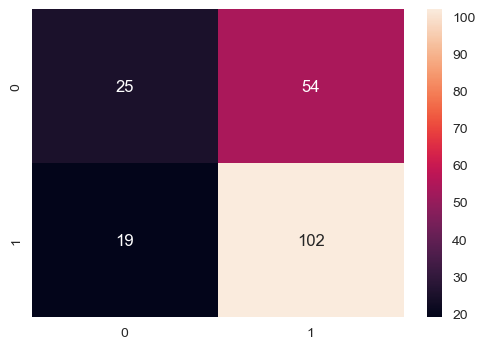

In [46]:
#2.using RandomForestClassifier
rf_clf=RandomForestClassifier()
model = rf_clf.fit(X_train,y_train)
rf_pred = model.predict(X_test)
cm=confusion_matrix(y_test,rf_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.58      0.32      0.41        79
           1       0.66      0.85      0.74       121

    accuracy                           0.64       200
   macro avg       0.62      0.58      0.58       200
weighted avg       0.63      0.64      0.61       200



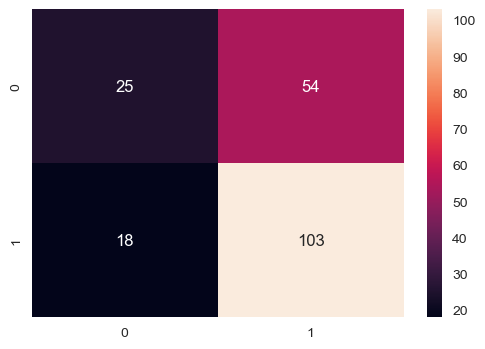

In [47]:
#3.using KNeighborsClassifier
knn_clf=KNeighborsClassifier()
model = knn_clf.fit(X_train,y_train)
knn_pred = model.predict(X_test)
cm=confusion_matrix(y_test,knn_pred)
#specify size of heatmap
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.56      0.06      0.11        79
           1       0.61      0.97      0.75       121

    accuracy                           0.61       200
   macro avg       0.58      0.52      0.43       200
weighted avg       0.59      0.61      0.50       200



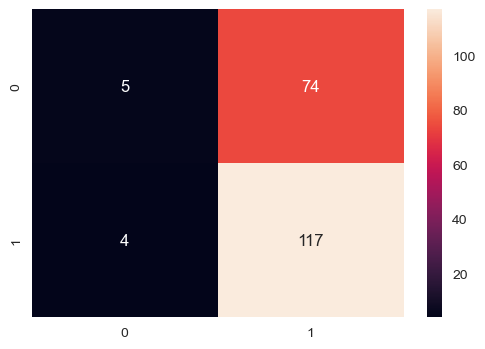

In [48]:
#4.using MultinomialNB Naive Bayes 
nb= MultinomialNB()
model = nb.fit(X_train,y_train)
nb_pred = model.predict(X_test)
cm=confusion_matrix(y_test,nb_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.58      0.09      0.15        79
           1       0.62      0.96      0.75       121

    accuracy                           0.61       200
   macro avg       0.60      0.52      0.45       200
weighted avg       0.60      0.61      0.52       200



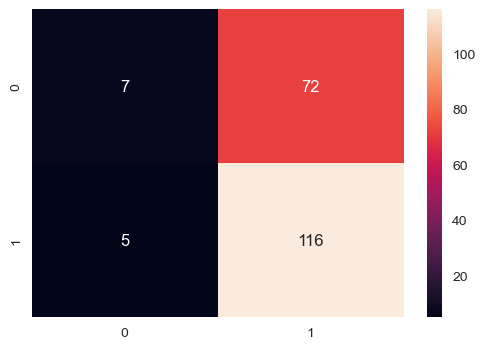

In [49]:
#5.using Support Vector Machines
svm = SVC()
model = svm.fit(X_train,y_train)
svm_pred = model.predict(X_test)
cm=confusion_matrix(y_test,svm_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.55      0.39      0.46        79
           1       0.67      0.79      0.72       121

    accuracy                           0.64       200
   macro avg       0.61      0.59      0.59       200
weighted avg       0.62      0.64      0.62       200



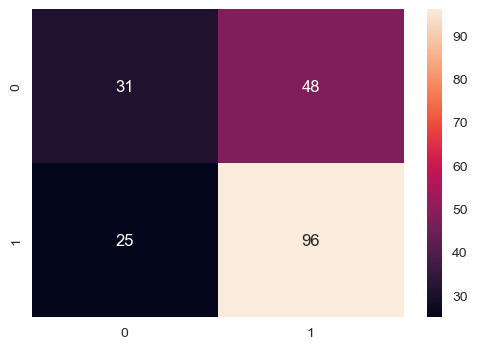

In [50]:
#6.using XGBClassifier
xg_clf = XGBClassifier()
model = xg_clf.fit(X_train,y_train)
xg_pred = model.predict(X_test)
cm=confusion_matrix(y_test,xg_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,xg_pred))

In [51]:
#Example of prediction
log_pred = model.predict([[1,1,72,72,74,0.699634]])
log_pred

array([1])

Using same dataset for Regression model to predict the performance score

In [53]:
#Splitting the data into independent and dependent variables
x=df1.drop(['lunch','gender','Performance_Level','Total_Performance_Score'],axis=1)
y=df1['Total_Performance_Score']
x

,race/ethnicity,parental level of education,test preparation course,math_score,reading_score,writing_score
0,1,1,1,72,72,74
1,2,4,0,69,90,88
2,1,3,1,90,95,93
3,0,0,1,47,57,44
4,2,4,1,76,78,75
...,...,...,...,...,...,...
995,4,3,0,88,99,95
996,2,2,1,62,55,55
997,2,2,0,59,71,65
998,3,4,0,68,78,77


In [54]:
#splitting the data into train ,test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2 )

In [55]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [56]:
modelsr = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression ': Lasso(random_state=42),
    'Decision Tree Regression ': DecisionTreeRegressor(random_state=42, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10, max_features=1),
    'KNN Model ': KNeighborsRegressor(3),
    'Support Vector Machines (SVM)': SVR(gamma=2, C=1),
    'XGBRegressor': XGBRegressor(random_state=42)
}

In [57]:
for name,model in modelsr.items():
    model.fit(x_train,y_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Lasso Regression  trained
Decision Tree Regression  trained
Random Forest trained
KNN Model  trained
Support Vector Machines (SVM) trained
XGBRegressor trained


In [58]:
def get_rmse(y_true,y_pred):
    rmser = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmser

In [59]:
for name,model in modelsr.items():
    y_predr = model.predict(x_train)
    rmser = get_rmse(y_train,y_predr)
    print(name + ' RMSE: {:.2f}'.format(rmser))

Linear Regression RMSE: 2.43
Ridge Regression RMSE: 2.43
Lasso Regression  RMSE: 2.44
Decision Tree Regression  RMSE: 2.64
Random Forest RMSE: 3.39
KNN Model  RMSE: 1.97
Support Vector Machines (SVM) RMSE: 13.34
XGBRegressor RMSE: 0.08


In [60]:
for name, model in modelsr.items():
    model.fit(x_train, y_train)
    y_predr = model.predict(x_train)
    MAEr = mae(y_train, y_predr)
    print(name + ' MAE: {:.2f}'.format(MAEr))

Linear Regression MAE: 0.50
Ridge Regression MAE: 0.50
Lasso Regression  MAE: 0.47
Decision Tree Regression  MAE: 1.70
Random Forest MAE: 2.11
KNN Model  MAE: 0.54
Support Vector Machines (SVM) MAE: 10.34
XGBRegressor MAE: 0.05


In [61]:
modelr = XGBRegressor()
modelr.fit(x_train, y_train)
y_test_predr = modelr.predict(x_test)
MAEr = mae(y_test,y_test_predr)
print('MAE :',MAEr)

MAE : 0.8730519167582194


In [62]:
#Example prediction
y_test_predr = modelr.predict([[1,1,1,72,72,74]])
y_test_predr

array([72.6336], dtype=float32)

Dataset - teacher_performance_evaluation

In [64]:
df2.head()

,TeacherID,Date,LoginTime,LogoutTime,PunctualityScore,StudentFeedbackScore,ClassEngagementScore,OverallPerformanceScore,Qualification,YearsOfExperience
0,1,2024-08-01,08:00,15:00,9,9,7,8.333333,PhD,8
1,2,2024-08-02,08:10,15:10,7,9,7,7.666667,B.Ed,3
2,3,2024-08-03,08:20,15:20,7,7,7,7.000000,B.Ed,21
3,4,2024-08-04,08:30,15:30,8,7,9,8.000000,M.Sc,25
4,5,2024-08-05,08:40,15:40,8,9,8,8.333333,PhD,24


In [65]:
df2['Attendance'] = df2.apply(lambda row: 'Present' if pd.notna(row['LoginTime']) and pd.notna(row['LogoutTime']) else 'Absent', axis=1)
df2.head()

,TeacherID,Date,LoginTime,LogoutTime,PunctualityScore,StudentFeedbackScore,ClassEngagementScore,OverallPerformanceScore,Qualification,YearsOfExperience,Attendance
0,1,2024-08-01,08:00,15:00,9,9,7,8.333333,PhD,8,Present
1,2,2024-08-02,08:10,15:10,7,9,7,7.666667,B.Ed,3,Present
2,3,2024-08-03,08:20,15:20,7,7,7,7.000000,B.Ed,21,Present
3,4,2024-08-04,08:30,15:30,8,7,9,8.000000,M.Sc,25,Present
4,5,2024-08-05,08:40,15:40,8,9,8,8.333333,PhD,24,Present


In [66]:
df2.columns

Index(['TeacherID', 'Date', 'LoginTime', 'LogoutTime', 'PunctualityScore',
       'StudentFeedbackScore', 'ClassEngagementScore',
       'OverallPerformanceScore', 'Qualification', 'YearsOfExperience',
       'Attendance'],
      dtype='object')

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TeacherID                100 non-null    int64  
 1   Date                     100 non-null    object 
 2   LoginTime                100 non-null    object 
 3   LogoutTime               100 non-null    object 
 4   PunctualityScore         100 non-null    int64  
 5   StudentFeedbackScore     100 non-null    int64  
 6   ClassEngagementScore     100 non-null    int64  
 7   OverallPerformanceScore  100 non-null    float64
 8   Qualification            100 non-null    object 
 9   YearsOfExperience        100 non-null    int64  
 10  Attendance               100 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.7+ KB


EDA and Preprocessing for teacher_performance_evaluation


In [69]:
df2.Qualification.value_counts()

Qualification
M.Ed    25
PhD     21
B.Ed    21
B.Sc    18
M.Sc    15
Name: count, dtype: int64

In [70]:
df2.PunctualityScore.value_counts()

PunctualityScore
9    38
7    32
8    30
Name: count, dtype: int64

In [71]:
df2.StudentFeedbackScore.value_counts()

StudentFeedbackScore
7    40
8    34
9    26
Name: count, dtype: int64

In [72]:
df2.ClassEngagementScore.value_counts()

ClassEngagementScore
7    39
9    32
8    29
Name: count, dtype: int64

In [73]:
df2.YearsOfExperience.value_counts()

YearsOfExperience
7     7
3     6
16    6
9     5
20    4
29    4
4     4
2     4
17    4
27    4
18    4
24    4
25    4
21    4
13    4
26    3
19    3
8     3
14    3
11    3
6     3
23    3
12    2
15    2
28    2
5     2
22    1
10    1
1     1
Name: count, dtype: int64

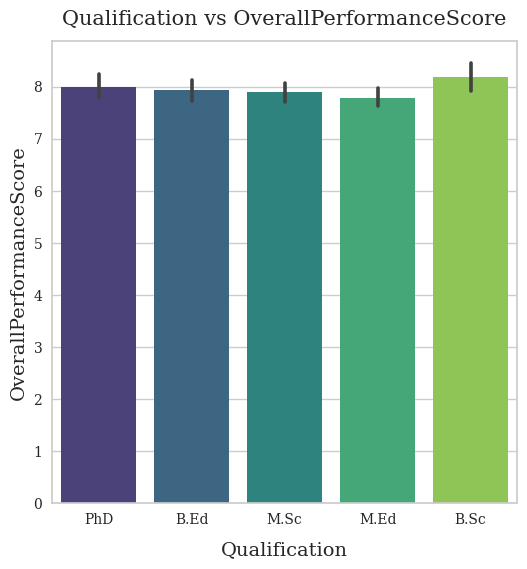

In [74]:
#  data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y='OverallPerformanceScore', x='Qualification', palette='viridis')
plt.ylabel('OverallPerformanceScore', fontsize=14, family='serif')
plt.xlabel('Qualification', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Qualification vs OverallPerformanceScore', weight=200, family='serif', size=15, pad=12)
plt.show()

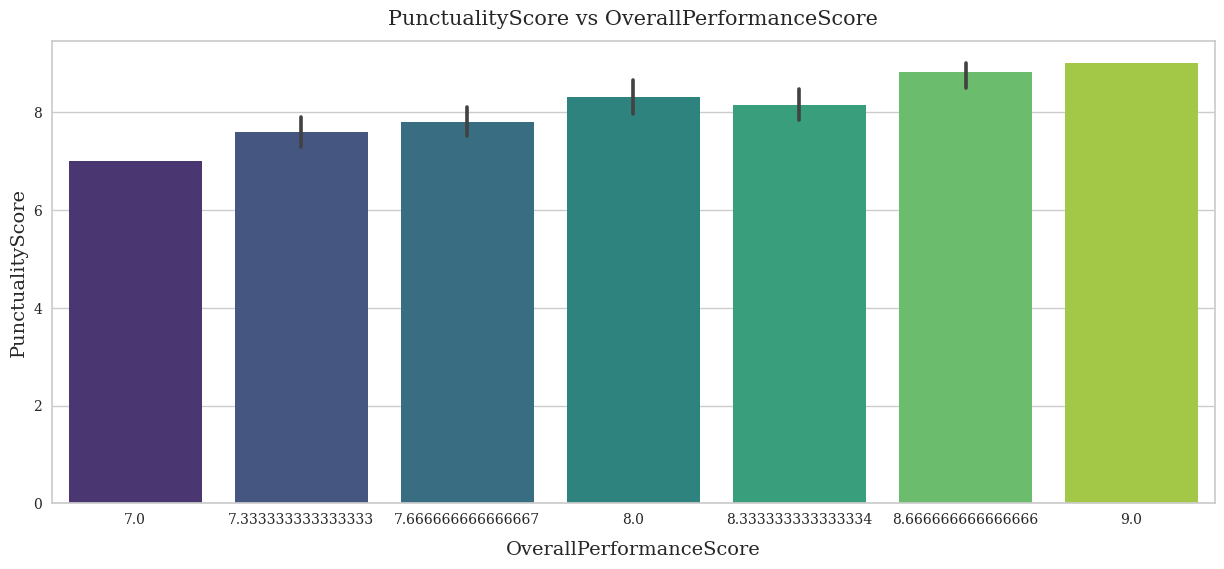

In [75]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df2, y='PunctualityScore', x='OverallPerformanceScore', palette='viridis')
plt.ylabel('PunctualityScore', fontsize=14, family='serif')
plt.xlabel('OverallPerformanceScore', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='PunctualityScore vs OverallPerformanceScore', weight=200, family='serif', size=15, pad=12)
plt.show()

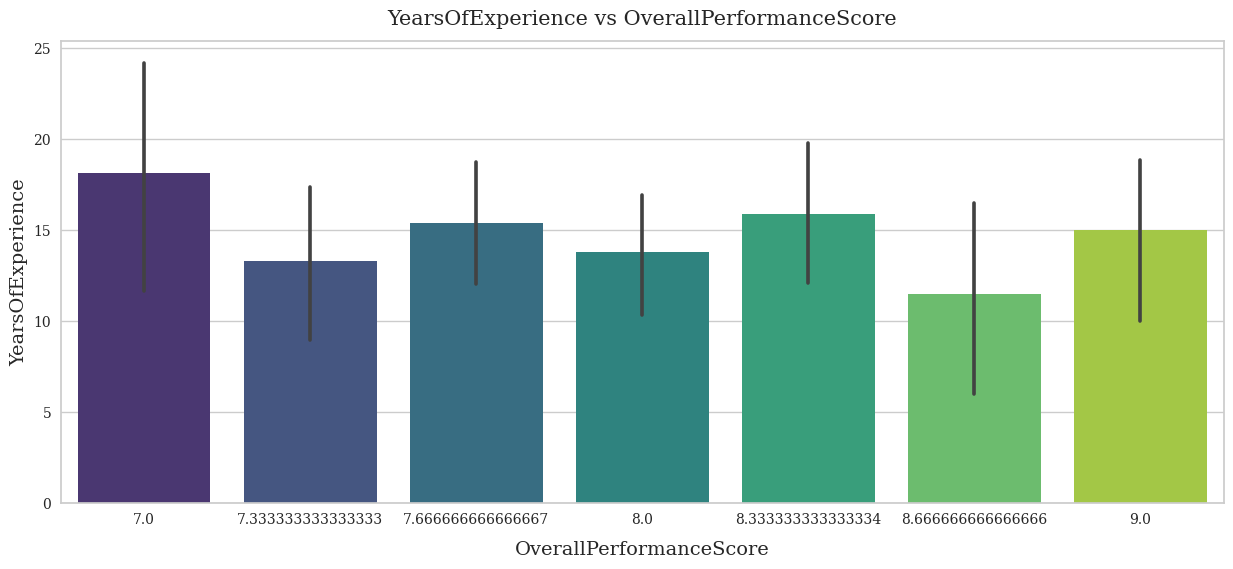

In [76]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df2, y='YearsOfExperience', x='OverallPerformanceScore', palette='viridis')
plt.ylabel('YearsOfExperience', fontsize=14, family='serif')
plt.xlabel('OverallPerformanceScore', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='YearsOfExperience vs OverallPerformanceScore', weight=200, family='serif', size=15, pad=12)
plt.show()

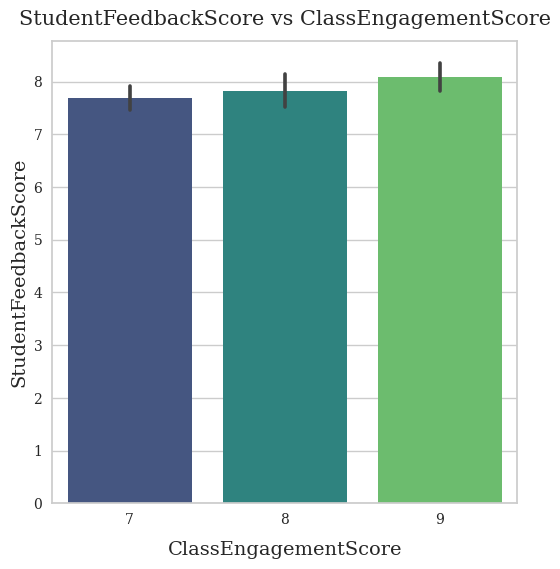

In [77]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y='StudentFeedbackScore', x='ClassEngagementScore', palette='viridis')
plt.ylabel('StudentFeedbackScore', fontsize=14, family='serif')
plt.xlabel('ClassEngagementScore', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='StudentFeedbackScore vs ClassEngagementScore', weight=200, family='serif', size=15, pad=12)
plt.show()

Text(0.5, 1.0, 'Qualification Versus StudentFeedbackScore')

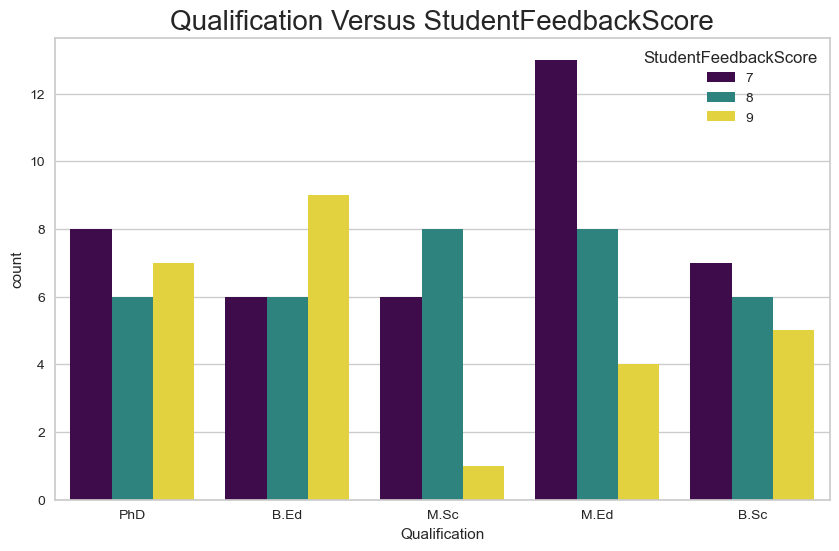

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Qualification', palette="viridis", hue='StudentFeedbackScore',data=df2)
plt.title("Qualification Versus StudentFeedbackScore", fontsize = 20)

Text(0.5, 1.0, 'PunctualityScore Versus StudentFeedbackScore')

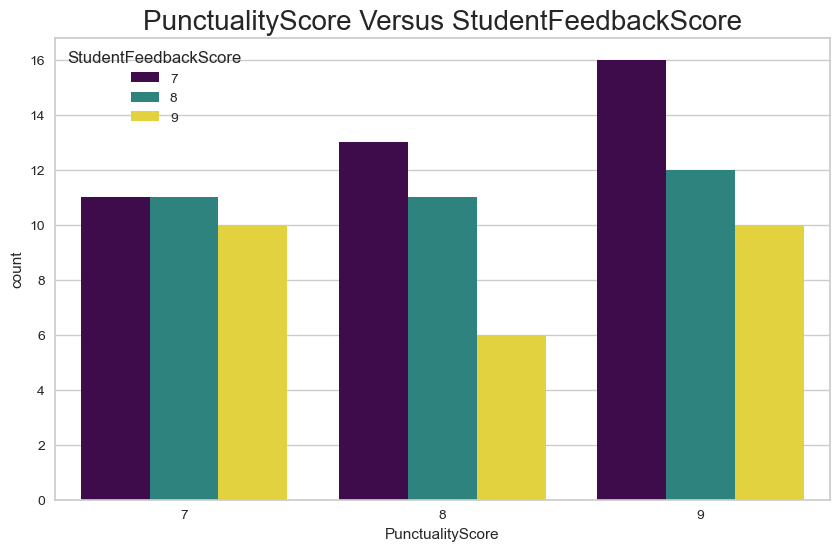

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PunctualityScore', palette="viridis", hue='StudentFeedbackScore',data=df2)
plt.title("PunctualityScore Versus StudentFeedbackScore", fontsize = 20)

Text(0.5, 1.0, 'ClassEngagementScore Versus StudentFeedbackScore')

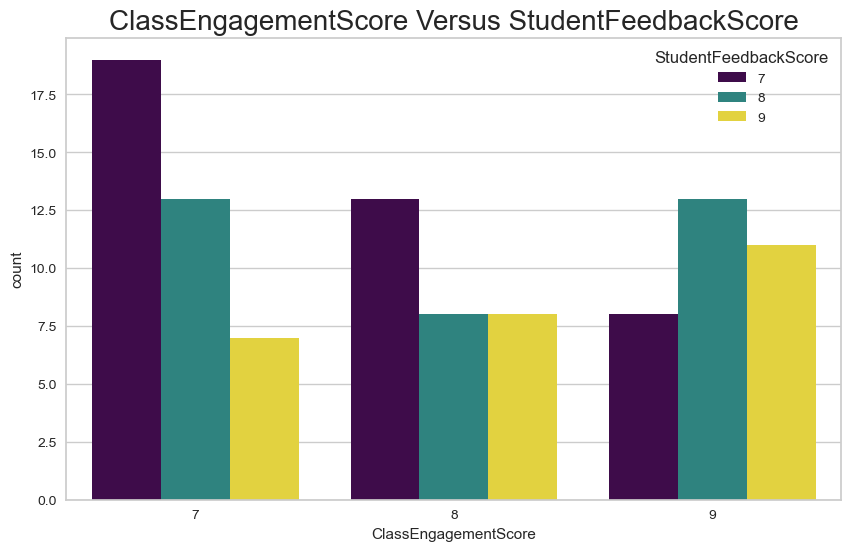

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ClassEngagementScore', palette="viridis", hue='StudentFeedbackScore',data=df2)
plt.title("ClassEngagementScore Versus StudentFeedbackScore", fontsize = 20)

Text(0.5, 1.0, 'Attendance Versus StudentFeedbackScore')

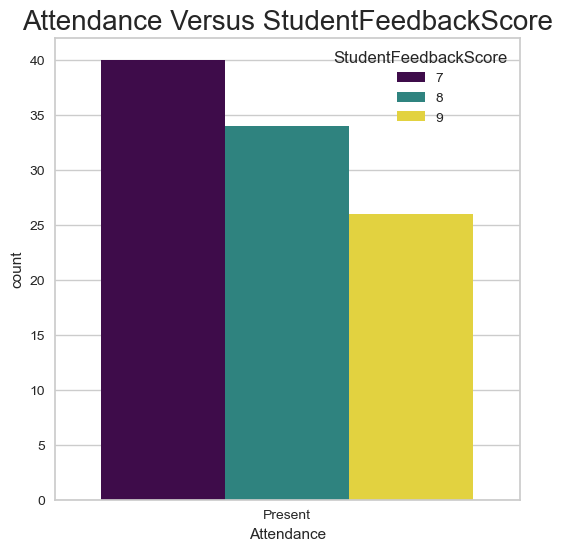

In [81]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Attendance', palette="viridis", hue='StudentFeedbackScore',data=df2)
plt.title("Attendance Versus StudentFeedbackScore", fontsize = 20)

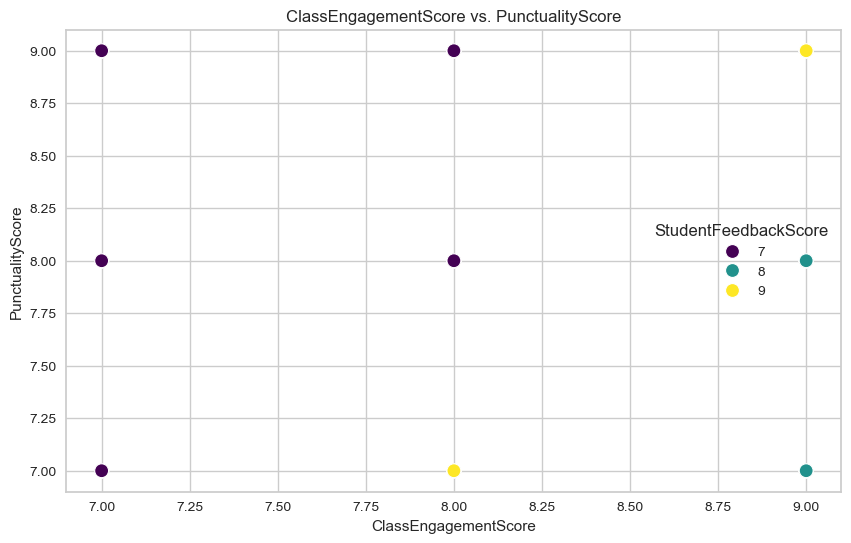

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='ClassEngagementScore', y='PunctualityScore', hue='StudentFeedbackScore', palette='viridis', s=100)
plt.title('ClassEngagementScore vs. PunctualityScore')
plt.xlabel('ClassEngagementScore')
plt.ylabel('PunctualityScore')
plt.legend(title='StudentFeedbackScore')

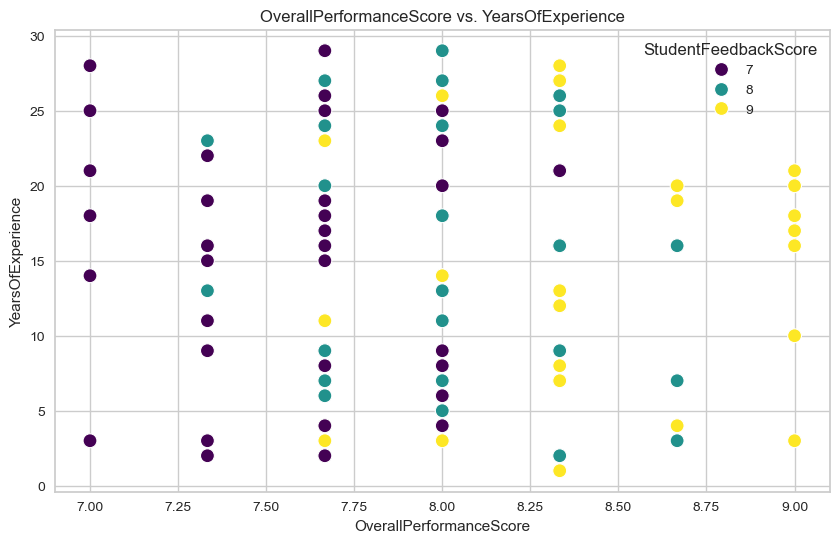

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='OverallPerformanceScore', y='YearsOfExperience', hue='StudentFeedbackScore', palette='viridis', s=100)
plt.title('OverallPerformanceScore vs. YearsOfExperience')
plt.xlabel('OverallPerformanceScore')
plt.ylabel('YearsOfExperience')
plt.legend(title='StudentFeedbackScore')

In [84]:
df2.describe()

,TeacherID,PunctualityScore,StudentFeedbackScore,ClassEngagementScore,OverallPerformanceScore,YearsOfExperience
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,8.06000,7.860000,7.930000,7.950000,14.820000
std,29.011492,0.83871,0.804281,0.843933,0.504469,8.361021
min,1.000000,7.00000,7.000000,7.000000,7.000000,1.000000
25%,25.750000,7.00000,7.000000,7.000000,7.666667,7.000000
50%,50.500000,8.00000,8.000000,8.000000,8.000000,15.500000
75%,75.250000,9.00000,9.000000,9.000000,8.333333,21.250000
max,100.000000,9.00000,9.000000,9.000000,9.000000,29.000000


Drop unwanted columns

In [86]:
df2.drop(['TeacherID','Date','LoginTime','LogoutTime'], axis=1, inplace=True)
df2

,PunctualityScore,StudentFeedbackScore,ClassEngagementScore,OverallPerformanceScore,Qualification,YearsOfExperience,Attendance
0,9,9,7,8.333333,PhD,8,Present
1,7,9,7,7.666667,B.Ed,3,Present
2,7,7,7,7.000000,B.Ed,21,Present
3,8,7,9,8.000000,M.Sc,25,Present
4,8,9,8,8.333333,PhD,24,Present
...,...,...,...,...,...,...,...
95,8,8,9,8.333333,B.Sc,16,Present
96,7,7,8,7.333333,M.Ed,16,Present
97,9,7,8,8.000000,M.Sc,8,Present
98,7,8,8,7.666667,PhD,24,Present


In [87]:
le1=LabelEncoder()
df2['Qualification']=le1.fit_transform(df2['Qualification'])
df2['Attendance']=le1.fit_transform(df2['Attendance'])
df2

,PunctualityScore,StudentFeedbackScore,ClassEngagementScore,OverallPerformanceScore,Qualification,YearsOfExperience,Attendance
0,9,9,7,8.333333,4,8,0
1,7,9,7,7.666667,0,3,0
2,7,7,7,7.000000,0,21,0
3,8,7,9,8.000000,3,25,0
4,8,9,8,8.333333,4,24,0
...,...,...,...,...,...,...,...
95,8,8,9,8.333333,1,16,0
96,7,7,8,7.333333,2,16,0
97,9,7,8,8.000000,3,8,0
98,7,8,8,7.666667,4,24,0


To predict the Overall performance of Teachers

In [89]:
X1=df2.drop(['OverallPerformanceScore'], axis=1)
y1=df2['OverallPerformanceScore']

In [90]:
X1

,PunctualityScore,StudentFeedbackScore,ClassEngagementScore,Qualification,YearsOfExperience,Attendance
0,9,9,7,4,8,0
1,7,9,7,0,3,0
2,7,7,7,0,21,0
3,8,7,9,3,25,0
4,8,9,8,4,24,0
...,...,...,...,...,...,...
95,8,8,9,1,16,0
96,7,7,8,2,16,0
97,9,7,8,3,8,0
98,7,8,8,4,24,0


In [91]:
#splitting the data into train ,test
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,random_state = 42, test_size = 0.2 )

In [92]:
print(X1_train.shape),print(y1_train.shape)
print(X1_test.shape),print(y1_test.shape)

(80, 6)
(80,)
(20, 6)
(20,)


(None, None)

Modeling and Evaluation

In [95]:
models1 = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression ': Lasso(random_state=42),
    'Decision Tree Regression ': DecisionTreeRegressor(random_state=42, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10, max_features=1),
    'KNN Model ': KNeighborsRegressor(3),
    'Support Vector Machines (SVM)': SVR(gamma=2, C=1),
    'XGBRegressor': XGBRegressor(random_state=42)
}

In [96]:
for name,model in models1.items():
    model.fit(X1_train,y1_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Lasso Regression  trained
Decision Tree Regression  trained
Random Forest trained
KNN Model  trained
Support Vector Machines (SVM) trained
XGBRegressor trained


In [97]:
def get_rmse(y1_true,y1_pred):
    rmse1 = np.sqrt(np.mean((y1_true-y1_pred)**2))
    return rmse1

In [98]:
for name,model in models1.items():
    y1_pred = model.predict(X1_train)
    rmse1 = get_rmse(y1_train,y1_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse1))

Linear Regression RMSE: 0.00
Ridge Regression RMSE: 0.01
Lasso Regression  RMSE: 0.48
Decision Tree Regression  RMSE: 0.05
Random Forest RMSE: 0.15
KNN Model  RMSE: 0.26
Support Vector Machines (SVM) RMSE: 0.09
XGBRegressor RMSE: 0.00


In [99]:
for name, model in models1.items():
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_train)
    MAE1 = mae(y1_train, y1_pred)
    print(name + ' MAE: {:.2f}'.format(MAE1))

Linear Regression MAE: 0.00
Ridge Regression MAE: 0.01
Lasso Regression  MAE: 0.38
Decision Tree Regression  MAE: 0.02
Random Forest MAE: 0.12
KNN Model  MAE: 0.20
Support Vector Machines (SVM) MAE: 0.09
XGBRegressor MAE: 0.00


By looking at the RMSE,MAE: XGBRegressor is the best performing model

In [101]:
model1 = XGBRegressor()
model1.fit(X1_train, y1_train)
y_test_pred1 = model1.predict(X1_test)
MAE1 = mae(y1_test,y_test_pred1)
print('MAE :',MAE1)

MAE : 0.04212550322214761


In [102]:
#Example prediction
y_test_pred1 = model1.predict([[9,9,7,4,8,0]])
y_test_pred1

array([8.04861], dtype=float32)

dataset3 - smart_school_app_competitors

In [104]:
df3.head()

,CompetitorID,CompetitorName,FeatureSet,PricingModel,UserRating,MarketShare,KeyStrengths,KeyWeaknesses,OverallScore
0,1,EduManagePro,"Attendance, Reporting",Freemium,4.4,16%,"Robust reporting, Easy integration","High cost, Limited customization",6.6
1,2,SmartEduApp,AI-Powered Assessment,One-time Purchase,3.3,12%,"AI-driven insights, Affordable","Limited support, Basic features",7.5
2,3,SchoolMate,"Behavior Tracking, Admin",Freemium,3.6,19%,"Comprehensive features, Low cost","Outdated UI, Poor customer support",6.2
3,4,ClassTrack,"Timetable Management, Parent Portal",Subscription,5.0,13%,"User-friendly, Scalable",Limited third-party integrations,8.1
4,5,EduHub,"Learning Analytics, Gamification",One-time Purchase,4.4,18%,"Engaging, Data-driven","Complex setup, Requires training",8.3


In [105]:
df3.columns

Index(['CompetitorID', 'CompetitorName', 'FeatureSet', 'PricingModel',
       'UserRating', 'MarketShare', 'KeyStrengths', 'KeyWeaknesses',
       'OverallScore'],
      dtype='object')

In [106]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CompetitorID    50 non-null     int64  
 1   CompetitorName  50 non-null     object 
 2   FeatureSet      50 non-null     object 
 3   PricingModel    50 non-null     object 
 4   UserRating      50 non-null     float64
 5   MarketShare     50 non-null     object 
 6   KeyStrengths    50 non-null     object 
 7   KeyWeaknesses   50 non-null     object 
 8   OverallScore    50 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ KB


EDA and preprocessing

In [108]:
df3.UserRating.value_counts()

UserRating
3.5    5
4.0    5
4.4    4
3.7    4
4.6    3
4.9    3
3.3    3
4.7    3
3.6    3
3.4    2
3.1    2
4.1    2
3.8    2
4.8    2
3.2    2
5.0    1
4.5    1
4.3    1
3.9    1
4.2    1
Name: count, dtype: int64

In [109]:
df3.PricingModel.value_counts()

PricingModel
Freemium             18
One-time Purchase    17
Subscription         15
Name: count, dtype: int64

In [110]:
df3.MarketShare.value_counts()

MarketShare
16%    6
1%     4
20%    4
10%    3
19%    3
14%    3
5%     3
12%    3
2%     3
3%     3
13%    2
18%    2
11%    2
9%     2
15%    2
7%     2
4%     2
8%     1
Name: count, dtype: int64

In [111]:
df3.OverallScore.value_counts()

OverallScore
6.9    4
6.2    4
8.1    4
7.8    4
7.5    4
7.9    4
6.6    3
6.7    3
6.8    2
7.6    2
7.1    2
8.2    2
8.3    2
6.4    1
7.7    1
7.0    1
8.4    1
6.1    1
7.4    1
7.2    1
8.0    1
7.3    1
6.3    1
Name: count, dtype: int64

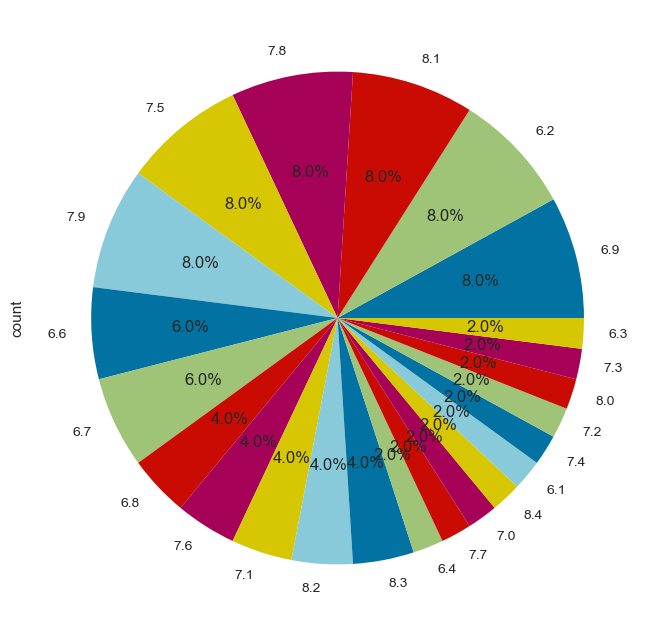

In [112]:
plt.figure(figsize=(8,8))
df3['OverallScore'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [113]:
df3['FeatureSet'].unique()

array(['Attendance, Reporting', 'AI-Powered Assessment',
       'Behavior Tracking, Admin', 'Timetable Management, Parent Portal',
       'Learning Analytics, Gamification', 'Communication, Cloud Storage',
       'Student Performance, Grading', 'Curriculum Planning, Attendance',
       'Virtual Classroom, Homework', 'Resource Management, Reporting',
       'Scheduling, Notifications', 'Analytics, Reporting',
       'Student Management, Notifications',
       'Content Management, Assessment',
       'Performance Monitoring, Attendance',
       'Parental Engagement, Reporting', 'Gradebook, Attendance',
       'Event Management, Communication',
       'Student Progress Tracking, Reporting',
       'Admin Tools, Communication',
       'Interactive Lessons, Behavior Tracking',
       'Course Planning, Analytics', 'Classroom Management, Grading',
       'Data Security, Reporting', 'Student Info, Attendance',
       'Customizable Reports, Communication',
       'Student Information System, Pa

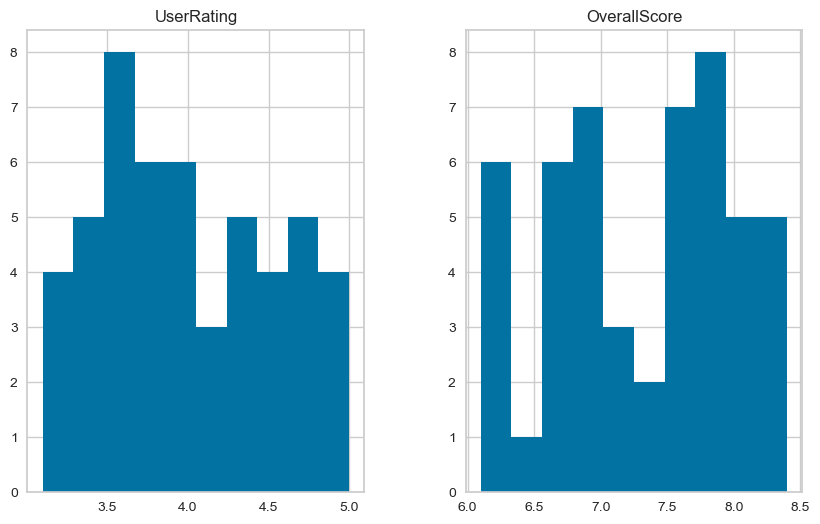

In [114]:
#univariate analysis of numerical columns - continuous variables -
df3[['UserRating','OverallScore']].hist(figsize=(10,6))
plt.show()

In [115]:
df3.describe()

,CompetitorID,UserRating,OverallScore
count,50.00000,50.000000,50.000000
mean,25.50000,3.998000,7.306000
std,14.57738,0.563694,0.681957
min,1.00000,3.100000,6.100000
25%,13.25000,3.500000,6.725000
50%,25.50000,4.000000,7.450000
75%,37.75000,4.475000,7.900000
max,50.00000,5.000000,8.400000


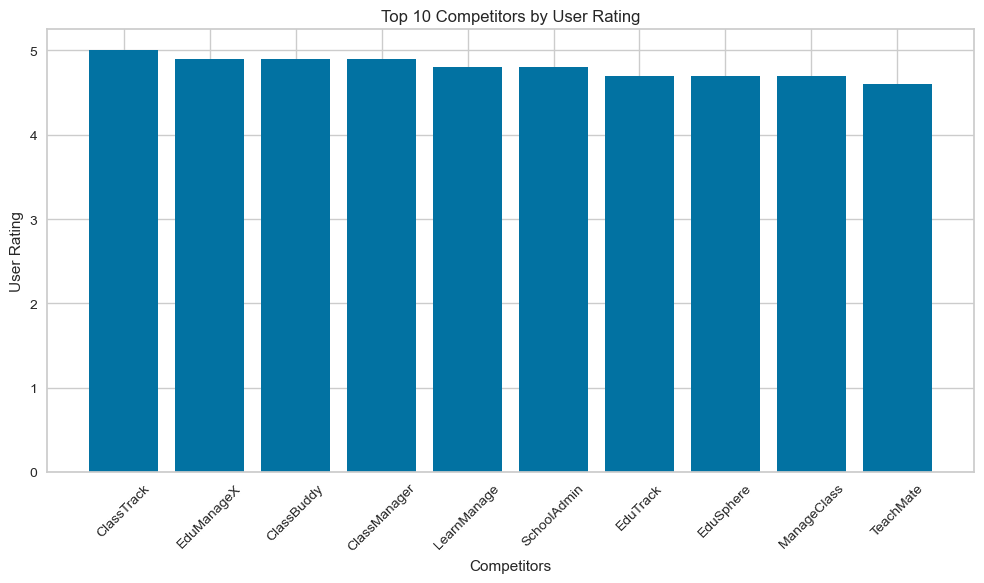

In [116]:
# This barplot show the top 10 CompetitorName
sorted_df = df3.sort_values(by='UserRating', ascending=False)
# Select the top 10 competitors
top_10_competitors = sorted_df.head(10)
# Create a bar chart to visualize their ratings
plt.figure(figsize=(10, 6))  
plt.bar(top_10_competitors['CompetitorName'], top_10_competitors['UserRating'])
plt.xlabel('Competitors')
plt.ylabel('User Rating')
plt.title('Top 10 Competitors by User Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

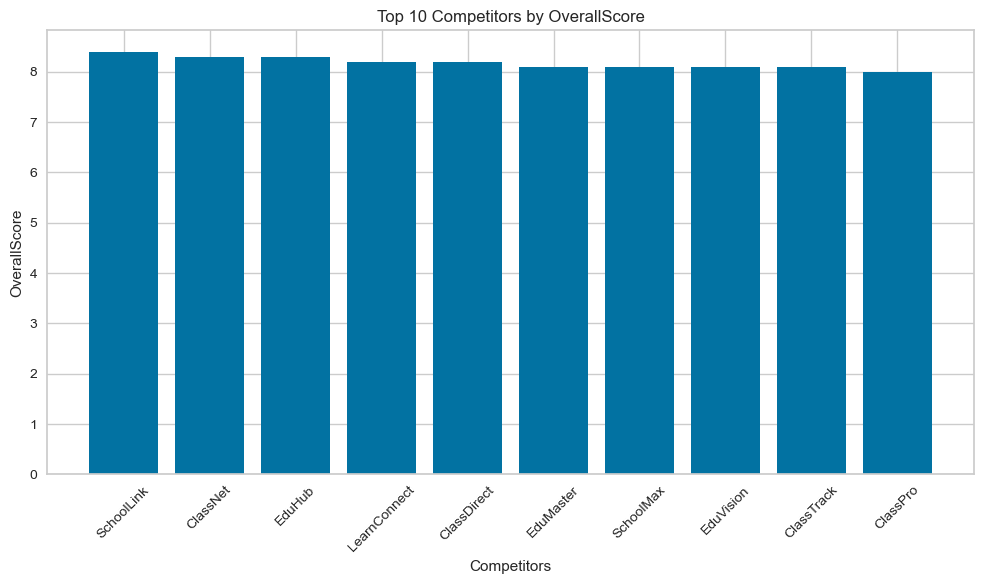

In [117]:
# This barplot show the top 10 CompetitorName
sorted_df = df3.sort_values(by='OverallScore', ascending=False)
# Select the top 10 competitors
top_10_competitors = sorted_df.head(10)
# Create a bar chart to visualize their ratings
plt.figure(figsize=(10, 6))  
plt.bar(top_10_competitors['CompetitorName'], top_10_competitors['OverallScore'])
plt.xlabel('Competitors')
plt.ylabel('OverallScore')
plt.title('Top 10 Competitors by OverallScore')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
# Show the plot
plt.tight_layout()
plt.show()

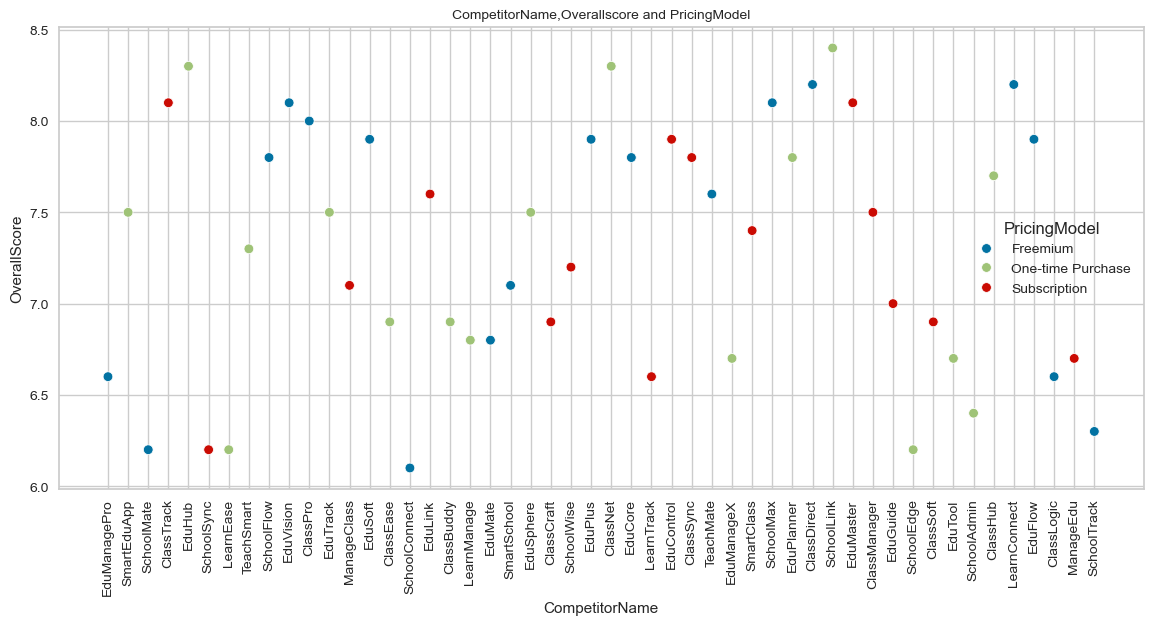

In [118]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='CompetitorName',y='OverallScore',hue='PricingModel',data=df3)
plt.title("CompetitorName,Overallscore and PricingModel", fontsize = 10)
plt.xticks(rotation=90);

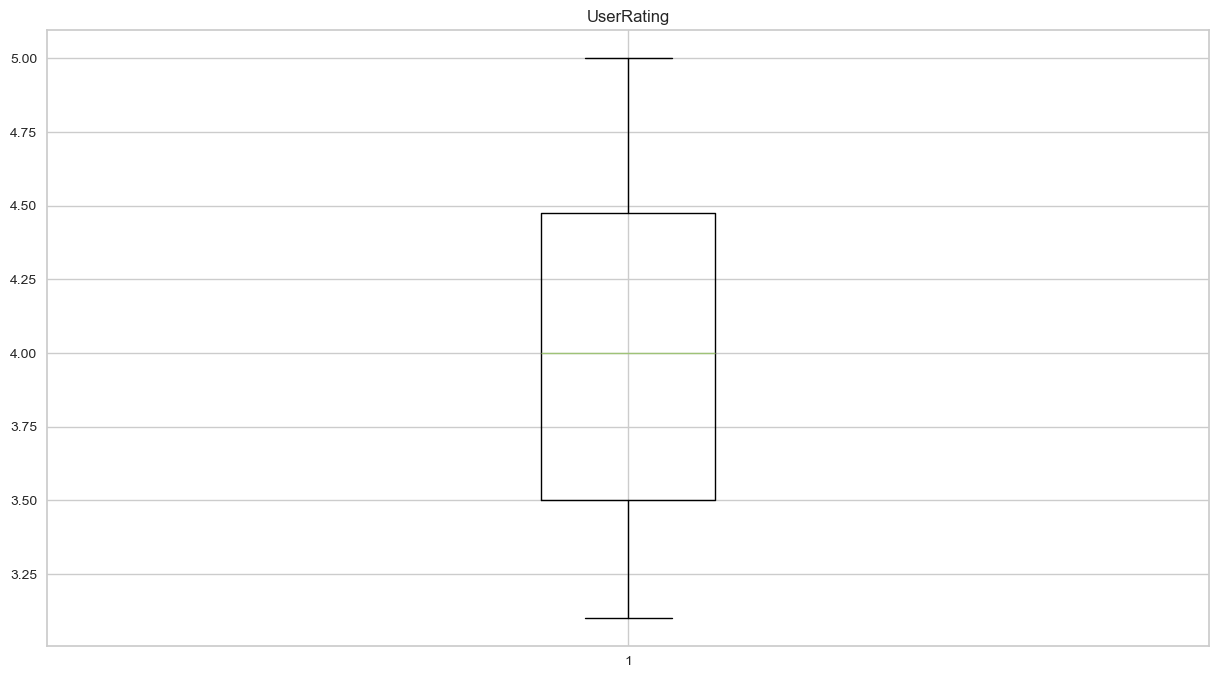

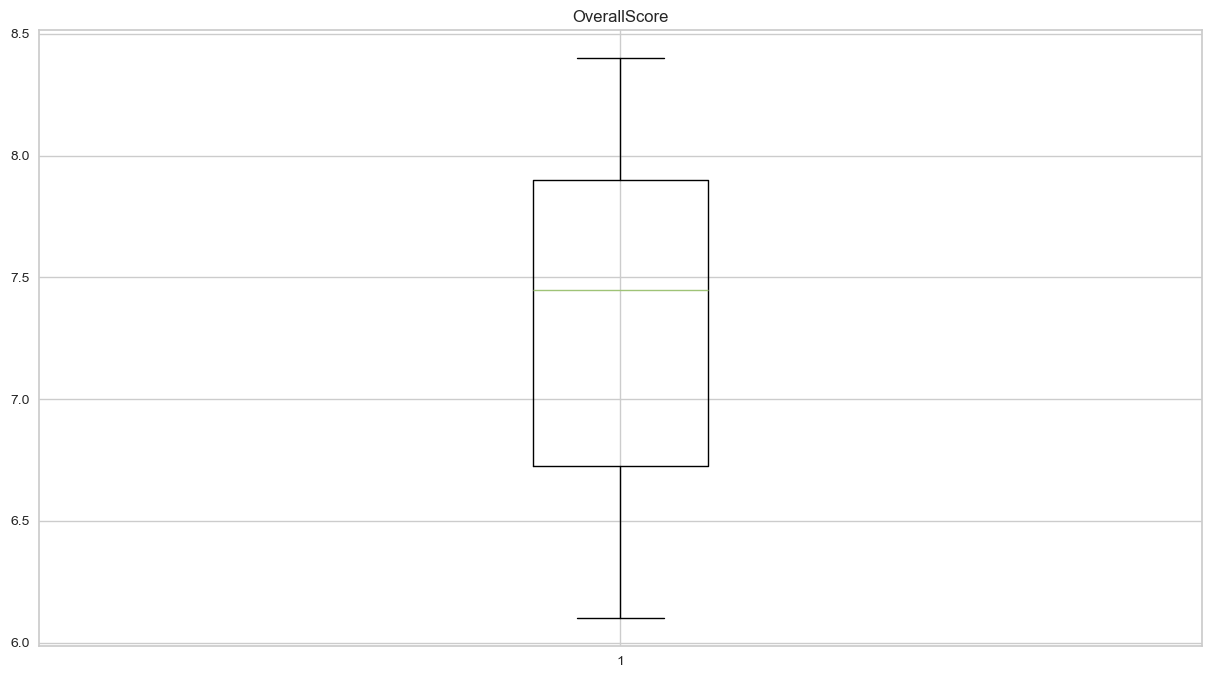

In [119]:
#Boxplot for numerical column
for i in ['UserRating','OverallScore']:
    plt.figure()
    plt.boxplot(df3[i])
    plt.title(i)

In [120]:
#Drop unwanted columns
df3.drop(['CompetitorID'],axis=1,inplace=True)

In [121]:
#use LabelEncoder to categorical columns 
le3=LabelEncoder()
df3['CompetitorName']=le3.fit_transform(df3['CompetitorName'])
df3['FeatureSet']=le3.fit_transform(df3['FeatureSet'])
df3['PricingModel']=le3.fit_transform(df3['PricingModel'])
df3['MarketShare']=le3.fit_transform(df3['MarketShare'])
df3['KeyStrengths']=le3.fit_transform(df3['KeyStrengths'])
df3['KeyWeaknesses']=le3.fit_transform(df3['KeyWeaknesses'])
df3

,CompetitorName,FeatureSet,PricingModel,UserRating,MarketShare,KeyStrengths,KeyWeaknesses,OverallScore
0,18,4,0,4.4,7,32,9,6.6
1,46,0,1,3.3,3,1,36,7.5
2,40,6,0,3.6,9,14,40,6.2
3,11,48,2,5.0,4,46,39,8.1
4,16,26,1,4.4,8,20,7,8.3
5,42,11,2,3.7,7,40,8,6.2
6,30,42,1,4.1,9,22,16,6.2
7,49,14,1,4.0,7,48,32,7.3
8,38,49,0,3.1,1,28,31,7.8
9,28,35,0,3.4,0,2,3,8.1


In [348]:
# selecting features for building a model 
X2=df3[['CompetitorName','FeatureSet','PricingModel','UserRating','MarketShare','KeyStrengths','KeyWeaknesses']]
X2.head()

,CompetitorName,FeatureSet,PricingModel,UserRating,MarketShare,KeyStrengths,KeyWeaknesses
0,18,4,0,4.4,7,32,9
1,46,0,1,3.3,3,1,36
2,40,6,0,3.6,9,14,40
3,11,48,2,5.0,4,46,39
4,16,26,1,4.4,8,20,7


In [278]:
# feature scaling
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [280]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=7)
X2_pca = pca.fit_transform(X2_scaled)
df3_pca = pd.DataFrame(X2_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7'])
df3_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.092007,-0.375603,0.756072,1.298744,1.551517,0.560615,-0.523316
1,0.043083,3.033368,0.029428,-0.122870,-0.069527,-0.617946,-1.378013
2,0.482027,2.409889,0.747568,0.737835,-0.174121,0.139548,0.084749
3,0.039833,-2.018264,-1.647984,0.344080,-2.134138,1.241827,-0.238744
4,-0.625688,-1.043375,0.038078,0.305034,0.616992,-0.602614,-0.118528


In [282]:
PCAsummary = pd.DataFrame({'Standard Deviation':df3_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
PCAsummary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.285259,0.231265,0.231265
PC2,1.101446,0.169846,0.401110
PC3,1.076511,0.162243,0.563353
PC4,0.996191,0.138935,0.702288
PC5,0.919443,0.118353,0.820641
PC6,0.826844,0.095714,0.916355
PC7,0.772958,0.083645,1.000000


In [284]:
df3_p=pca.fit(X2_scaled)
# correlation coefficient between original variables and the component
index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
rot_matrix = df3_p.components_.T
rot_df = pd.DataFrame(rot_matrix, index=X2.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
CompetitorName,-0.129,-0.274,-0.710,0.283,0.421,0.086,0.374
FeatureSet,0.433,0.361,0.012,0.450,0.511,-0.059,-0.464
PricingModel,-0.383,0.266,0.508,0.364,0.221,0.423,0.405
UserRating,0.136,0.532,-0.136,-0.684,0.364,0.100,0.262
MarketShare,-0.573,0.141,-0.276,-0.127,-0.005,0.426,-0.615
KeyStrengths,-0.487,0.425,-0.104,0.144,-0.045,-0.739,0.057
KeyWeaknesses,-0.255,-0.491,0.364,-0.283,0.615,-0.272,-0.173


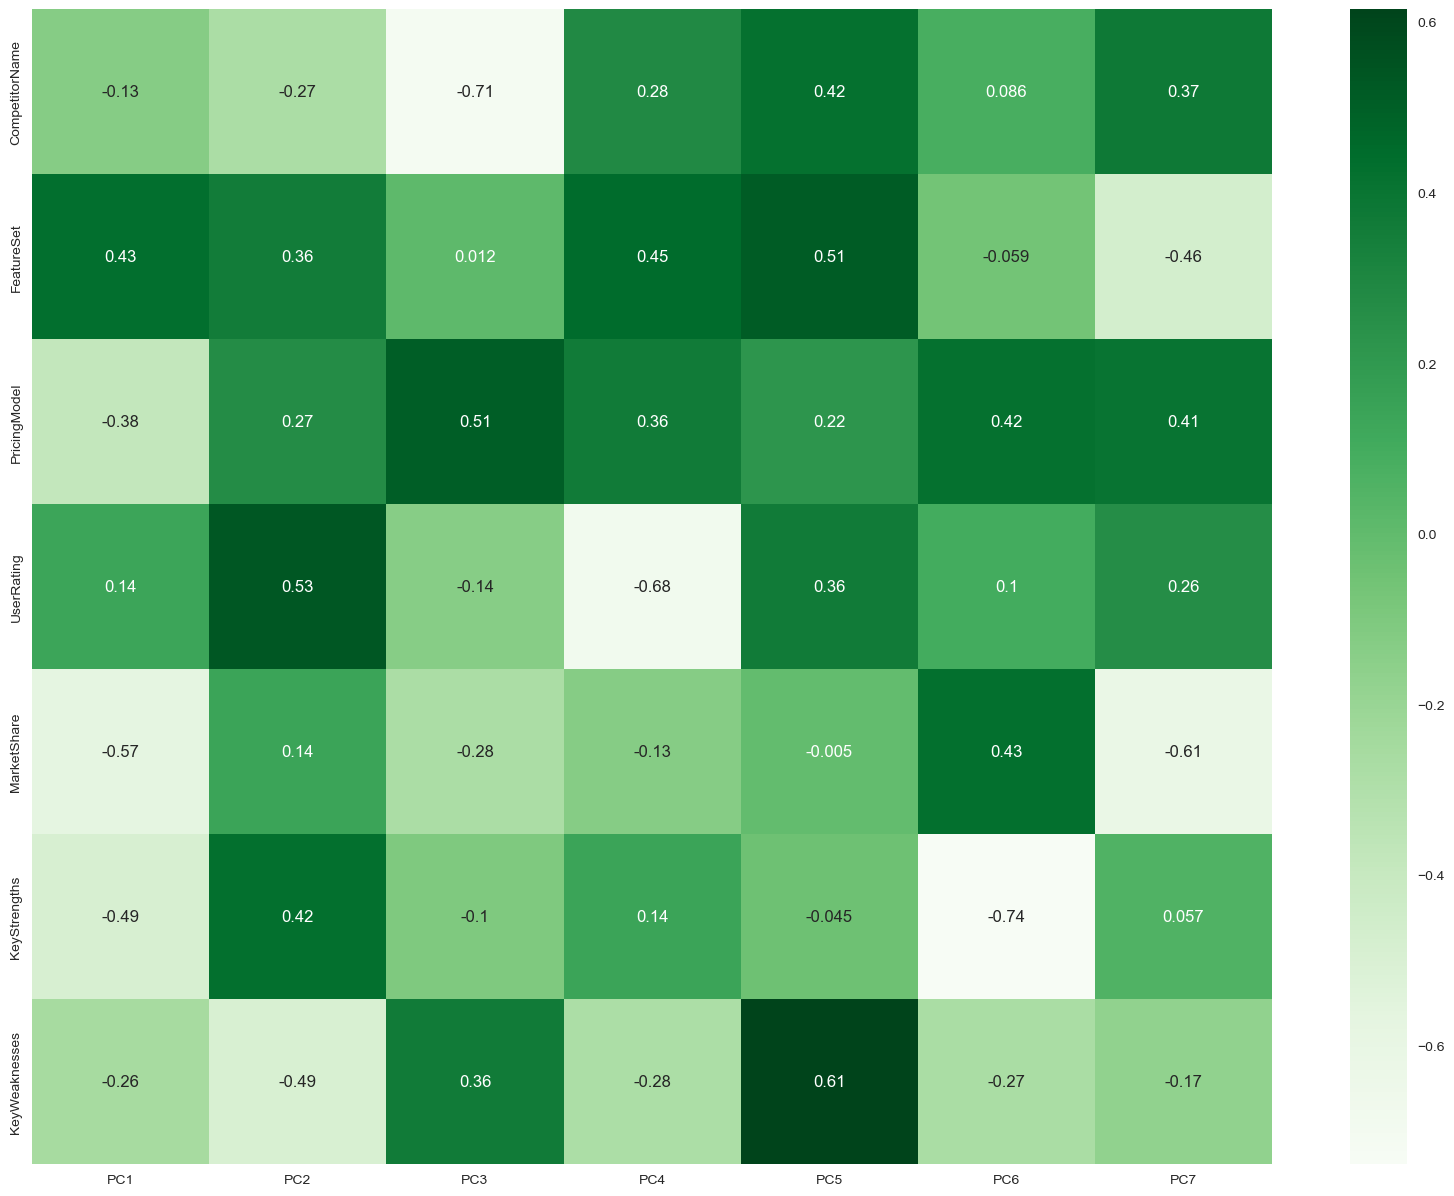

In [286]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(rot_df, annot=True, cmap='Greens')
plt.show()

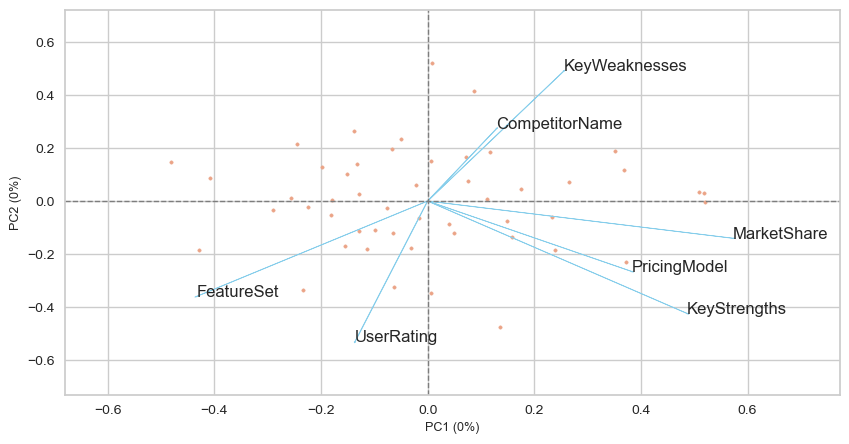

In [288]:
# get PC scores
pca_scores = X2_pca
loadings = pca.components_
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X2.columns.values, var1=0,var2=0, show=True,dim=(10,5))

Extracting Segments

K-Means clustering analysis K-Means clustering is an unsupervised machine learning algorithm that groups data points into k distinct clusters based on their similarity. It's an iterative process that aims to minimize the within-cluster sum of squares, meaning it tries to create clusters where data points within each group are as close as possible to each other and far from points in other groups.This algorithm helps us identify the optimal number of clusters by generating an "elbow curve."

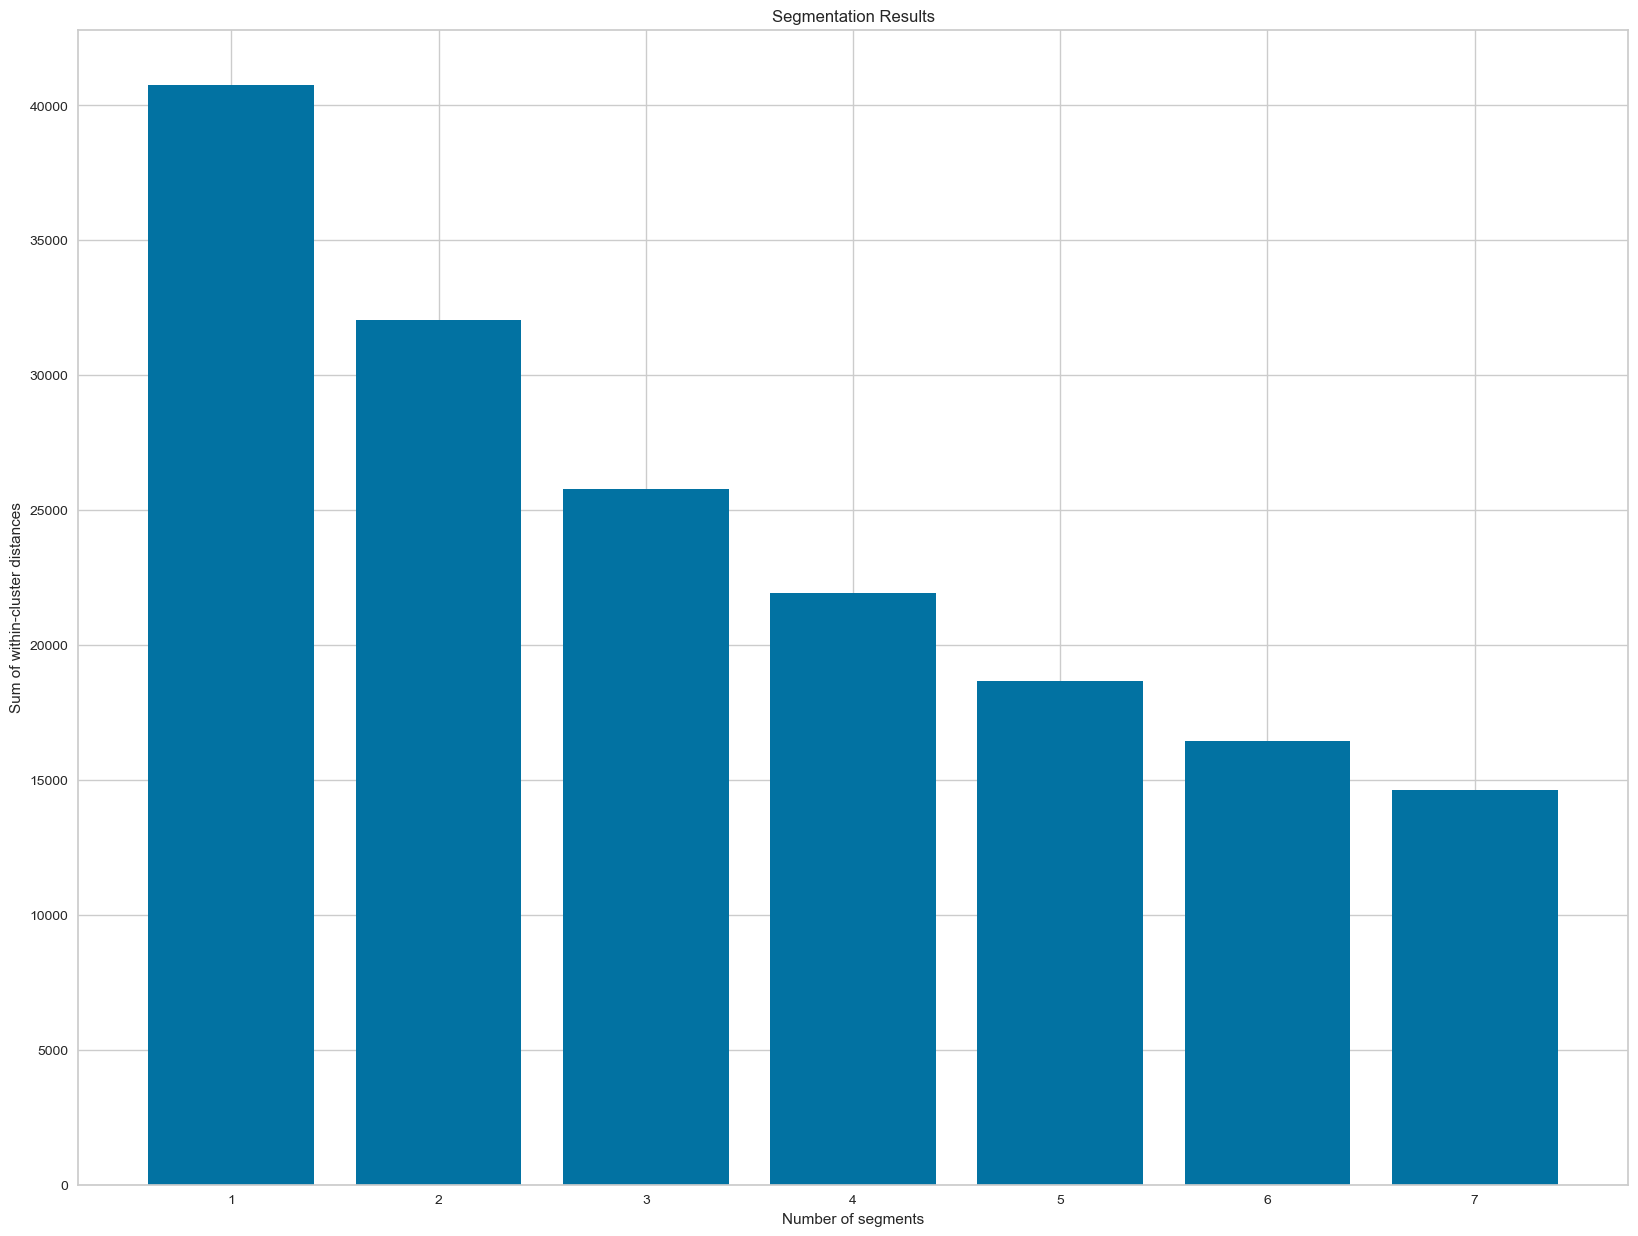

In [291]:
np.random.seed(90)
nrep = 10
num_segments = range(1, 8)
wcss = []
X2_k = {}
for k in num_segments:
  # Create a KMeans object with 'k' clusters, 'n_init' repetitions, and a fixed random seed for reproducibility.
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=90)
    # Fit the KMeans model on the original DataFrame 'X2'.
    kmeans.fit(X2)
    # Calculate and store the sum of within-cluster distances (inertia) for the current number of clusters.
    wcss.append((kmeans.inertia_))
    # Store the KMeans model in the 'X2_k' dictionary, indexed by the number of clusters.
    X2_k[str(k)] = kmeans
    # Create a bar plot to visualize the sum of within-cluster distances for different numbers of clusters.
plt.bar(num_segments, wcss)
# Add labels and a title to the plot for better interpretation.
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
# Display the plot showing the relationship between the number of clusters and within-cluster distances.
plt.show()

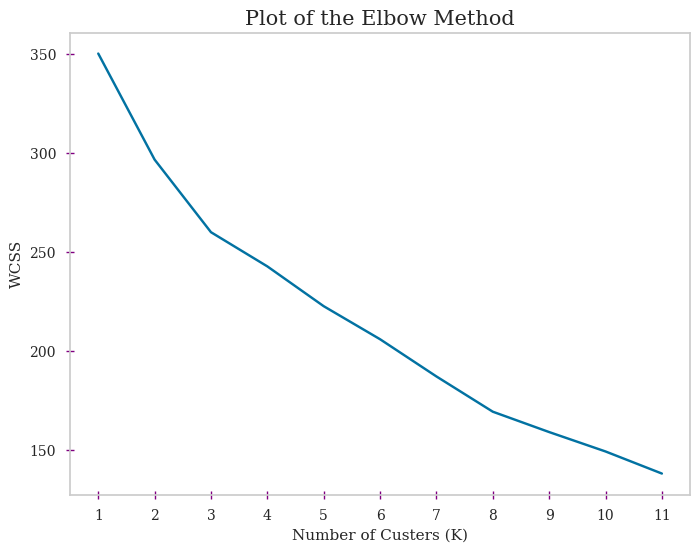

In [293]:
# plotting the results of Elbow

wcss = []

for i in range(1, 12):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X2_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 12), wcss)
plt.xticks(range(1, 12), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

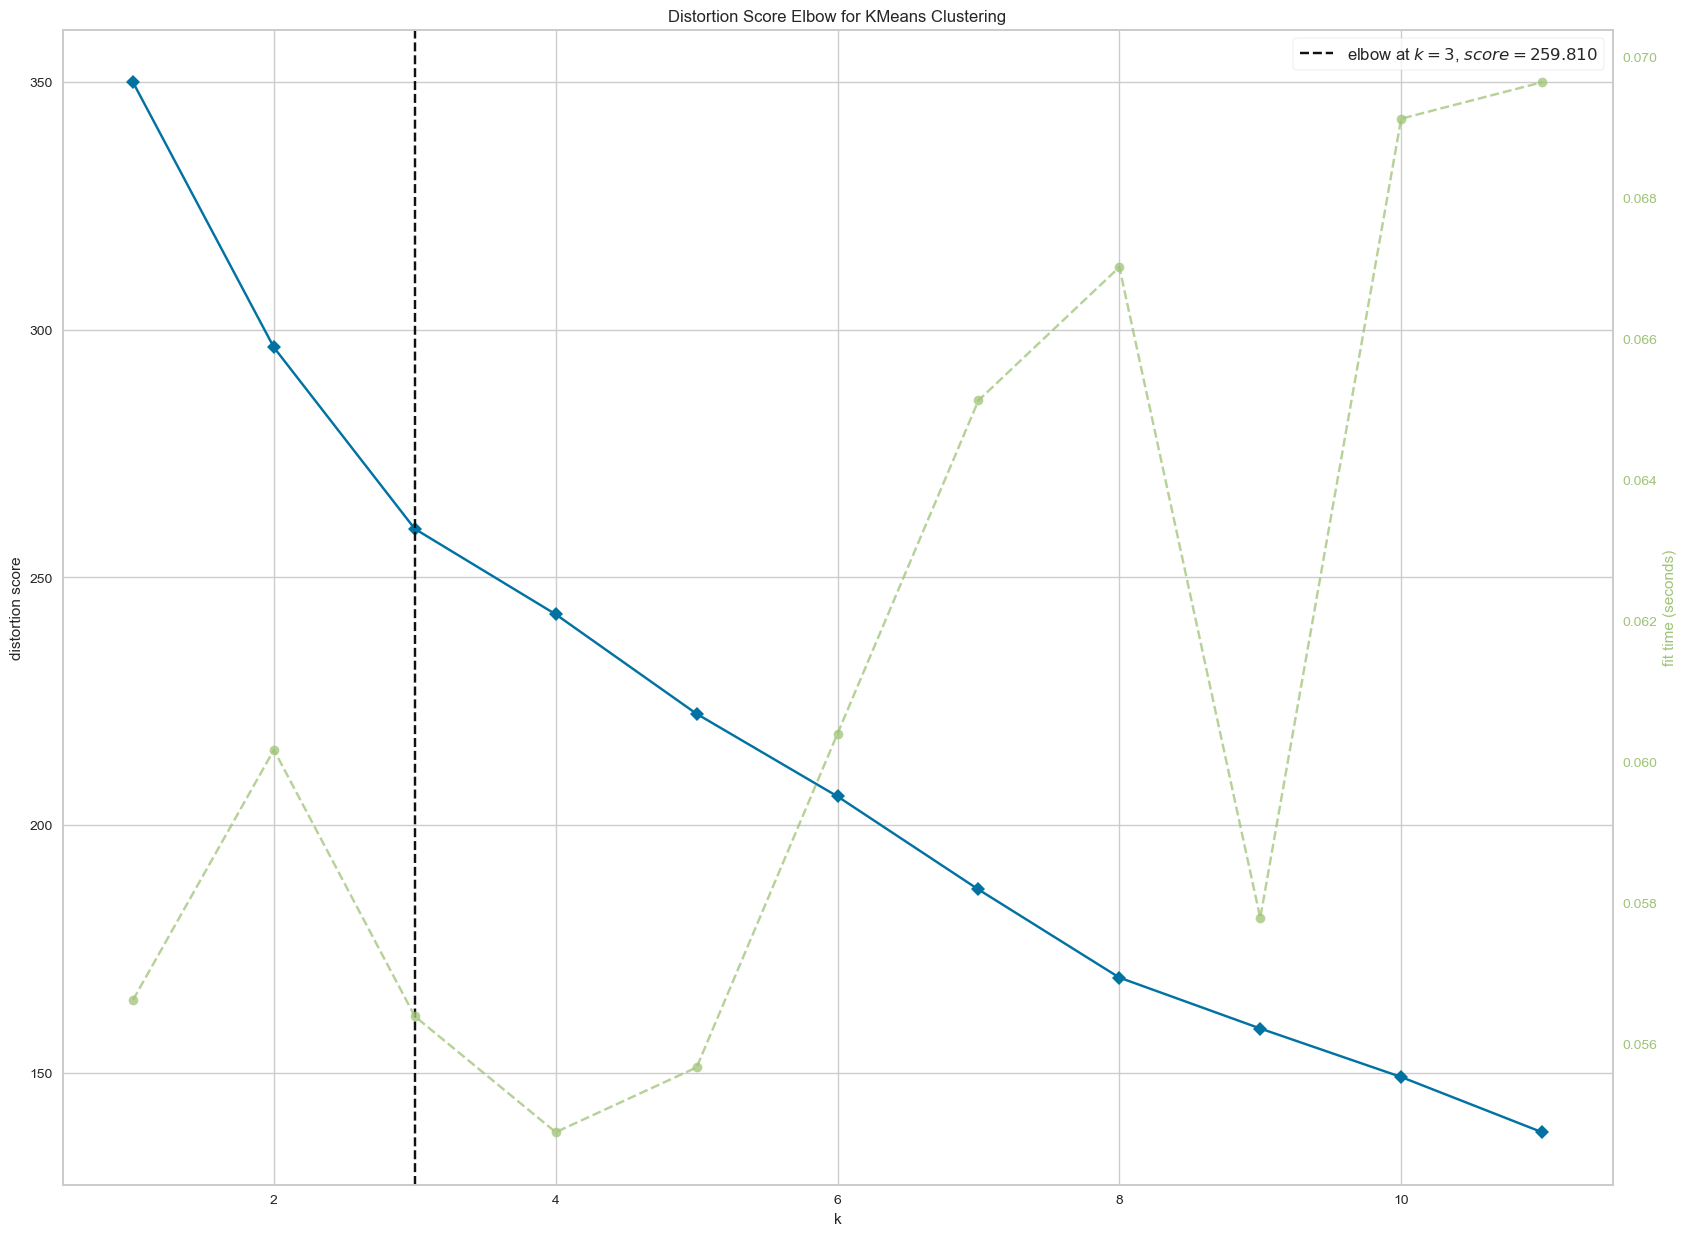

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [295]:
model = KMeans(n_clusters=i, init='k-means++', random_state=90)
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(X2_scaled)

# Display the elbow p
visualizer.show()


Based on the elbow method, the optimal number of clusters for the given data is likely k=3. This means that the KMeans algorithm can effectively group the data points into three distinct clusters with minimal distortion.

In [298]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=3,random_state=90)  
df3['Cluster'] = kmeans.fit_predict(X2_scaled)

# analyze the clusters
print(df3['Cluster'].value_counts())

Cluster
1    20
2    17
0    13
Name: count, dtype: int64


In [300]:
#Model Evaluation
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=90).fit(X2_scaled)
df3['Cluster Number'] = kmeans.labels_ 
# Label assigned for each data point
print (kmeans.labels_) 

# Gives within-cluster sum of squares. 
print (kmeans.inertia_) 

# Number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.n_iter_) 

# Location of the centroids on each cluster.
print(kmeans.cluster_centers_)  

[2 1 1 2 2 0 1 0 1 1 2 2 0 1 2 1 0 2 1 0 1 2 0 0 1 2 2 0 1 2 1 2 1 1 1 2 1
 0 2 0 1 2 1 0 0 1 2 2 0 1]
259.81026622540463
4
[[ 0.15191792 -0.6796328   0.8336176  -0.29968132  0.96528801  0.93549455
   0.01506907]
 [ 0.67563496  0.36726823 -0.48137144 -0.35482048 -0.28130713 -0.42270495
  -0.15625193]
 [-0.91103718  0.08763892 -0.07115294  0.64660392 -0.40721186 -0.21807825
   0.1723024 ]]


Profiling Segments

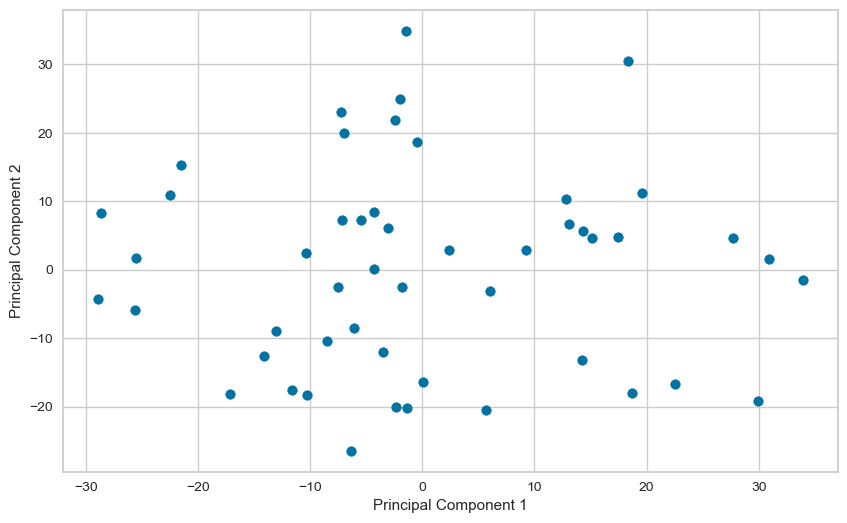

In [303]:
kmeans = KMeans(n_clusters=3,random_state=90)

# Fit the KMeans model on the data 'df3'.
# The 'fit' function identifies the cluster centers and assigns data points to their respective clusters.
kmeans.fit(df3)

# Create a PCA model with 2 principal components.
# 'n_components=2' specifies that the data should be transformed into a 2-dimensional space.
pca = PCA(n_components=2)
df3_pca = pca.fit_transform(df3)
# Create a new figure and axis for the scatter plot.
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df3_pca[:, 0], df3_pca[:, 1])

# Set the labels for the x-axis and y-axis.
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Display the plot.
plt.show()

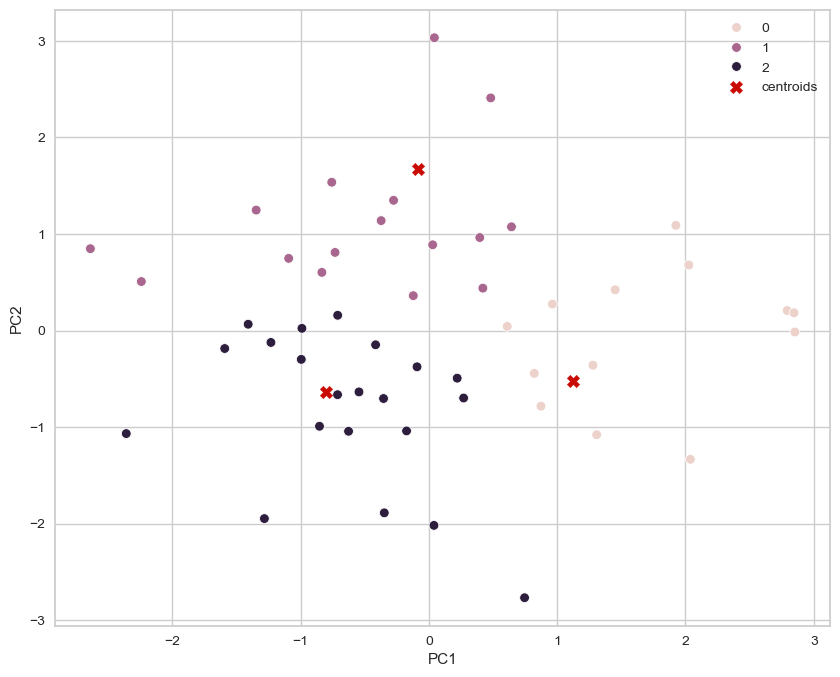

In [305]:
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2_scaled)

# Convert PCA results to DataFrame
X2_pca_df = pd.DataFrame(data=X2_pca, columns=['PC1', 'PC2'])
kmeans = KMeans(n_clusters=3, random_state=90)
kmeans.fit(X2_pca_df)
plt.figure(figsize=(10,8))
sns.scatterplot(data=X2_pca_df, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()

In [307]:
features = X2[['CompetitorName','FeatureSet','PricingModel','UserRating','MarketShare','KeyStrengths','KeyWeaknesses']]
kmeans = KMeans(n_clusters=3, random_state=90)
X2['Segment'] = kmeans.fit_predict(features)
# Analyze the segments
print(X2.groupby('Segment').mean())

         CompetitorName  FeatureSet  PricingModel  UserRating  MarketShare  \
Segment                                                                      
0             37.500000   10.250000      1.083333    3.891667     9.750000   
1             29.684211   36.157895      0.736842    3.968421     6.894737   
2             11.105263   21.842105      1.052632    4.094737     7.684211   

         KeyStrengths  KeyWeaknesses  
Segment                               
0           32.833333      29.333333  
1           16.421053      16.789474  
2           27.315789      22.473684  


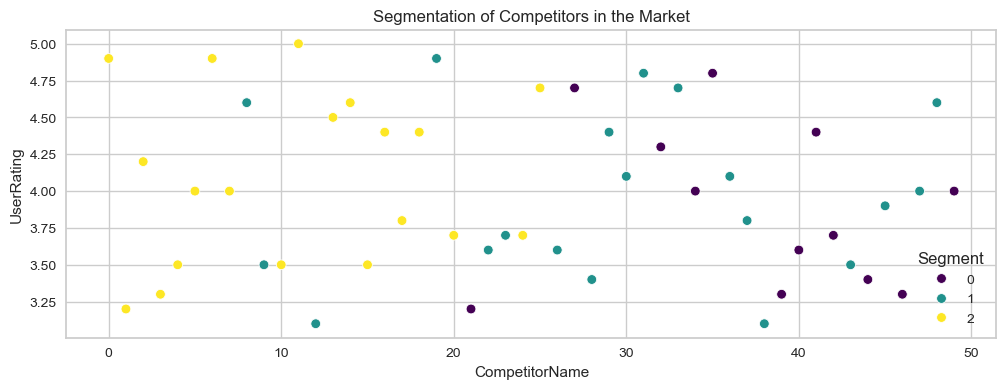

In [316]:
# Plot the segments
plt.figure(figsize = (12,4))
sns.scatterplot(x='CompetitorName', y='UserRating', hue='Segment', palette='viridis',data=X2)
plt.title('Segmentation of Competitors in the Market')
plt.show()

Target Segment

In [318]:
overallscore = df3.groupby('Cluster Number')['OverallScore'].mean()
overallscore = overallscore.to_frame().reset_index()
overallscore

,Cluster Number,OverallScore
0,0,7.046154
1,1,7.310000
2,2,7.500000


In [320]:
marketshare = df3.groupby('Cluster Number')['MarketShare'].mean()
marketshare = marketshare.to_frame().reset_index()
marketshare

,Cluster Number,MarketShare
0,0,12.615385
1,1,6.500000
2,2,5.882353


In [322]:
user_rating = df3.groupby('Cluster Number')['UserRating'].mean()
user_rating = user_rating.to_frame().reset_index()
user_rating

,Cluster Number,UserRating
0,0,3.830769
1,1,3.800000
2,2,4.358824


In [332]:
pricing_model = df3.groupby('Cluster Number')['PricingModel'].mean()
pricing_model = pricing_model.to_frame().reset_index()
pricing_model

,Cluster Number,PricingModel
0,0,1.615385
1,1,0.550000
2,2,0.882353


In [324]:
feature = df3.groupby('Cluster Number')['FeatureSet'].mean()
feature = feature.to_frame().reset_index()
feature

,Cluster Number,FeatureSet
0,0,14.692308
1,1,29.800000
2,2,25.764706


In [328]:
competitor_name = df3.groupby('Cluster Number')['CompetitorName'].mean()
competitor_name = competitor_name.to_frame().reset_index()
competitor_name

,Cluster Number,CompetitorName
0,0,26.692308
1,1,34.250000
2,2,11.352941


In [344]:
key_strengths = df3.groupby('Cluster Number')['KeyStrengths'].mean()
key_strengths = key_strengths.to_frame().reset_index()
key_strengths

,Cluster Number,KeyStrengths
0,0,38.000000
1,1,18.400000
2,2,21.352941


   Cluster Number  MarketShare  UserRating  OverallScore
0               0    12.615385    3.830769      7.046154
1               1     6.500000    3.800000      7.310000
2               2     5.882353    4.358824      7.500000


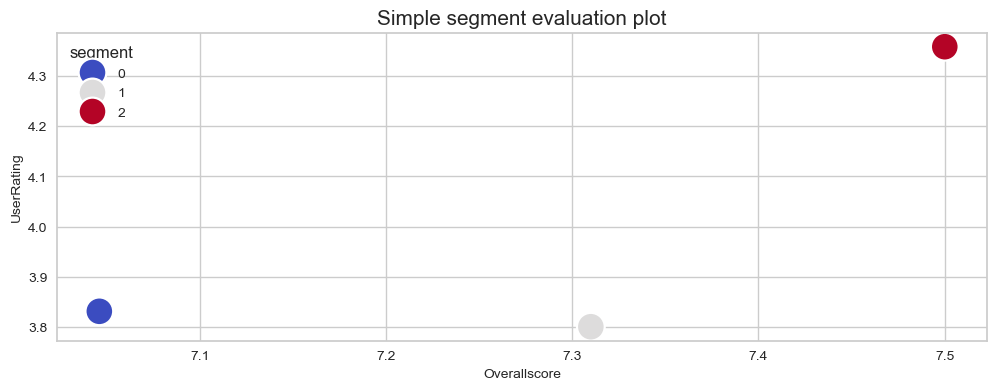

In [340]:
segment = marketshare.merge(user_rating, on='Cluster Number', how='left').merge(overallscore, on='Cluster Number', how='left')
print(segment)
plt.figure(figsize = (12,4))
sns.scatterplot(x="OverallScore", y="UserRating", data=segment, hue='Cluster Number',s=400, palette='coolwarm')
plt.title("Simple segment evaluation plot", fontsize=15)
plt.xlabel("Overallscore", fontsize=10)
plt.ylabel("UserRating", fontsize=10)
plt.legend(title='segment')
plt.show()

   Cluster Number  PricingModel  CompetitorName  OverallScore
0               0      1.615385       26.692308      7.046154
1               1      0.550000       34.250000      7.310000
2               2      0.882353       11.352941      7.500000


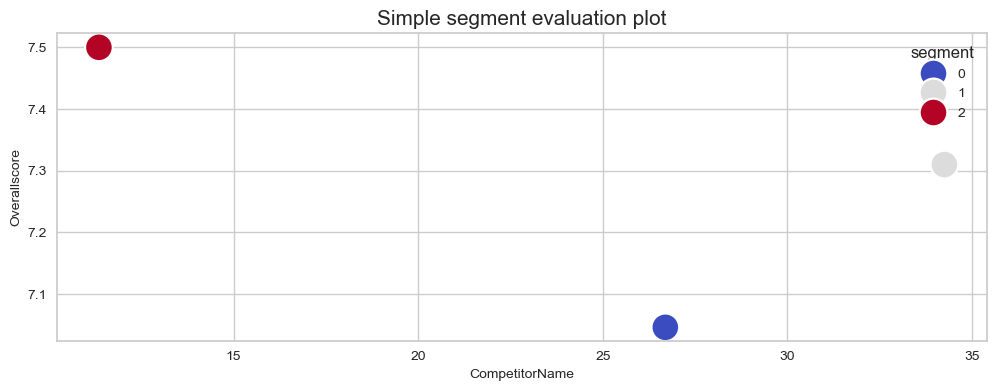

In [342]:
segment = pricing_model.merge(competitor_name, on='Cluster Number', how='left').merge(overallscore, on='Cluster Number', how='left')
print(segment)
plt.figure(figsize = (12,4))
sns.scatterplot(x="CompetitorName", y="OverallScore", data=segment, hue='Cluster Number',s=400, palette='coolwarm')
plt.title("Simple segment evaluation plot", fontsize=15)
plt.xlabel("CompetitorName", fontsize=10)
plt.ylabel("Overallscore", fontsize=10)
plt.legend(title='segment')
plt.show()

   Cluster Number  FeatureSet  CompetitorName  KeyStrengths
0               0   14.692308       26.692308     38.000000
1               1   29.800000       34.250000     18.400000
2               2   25.764706       11.352941     21.352941


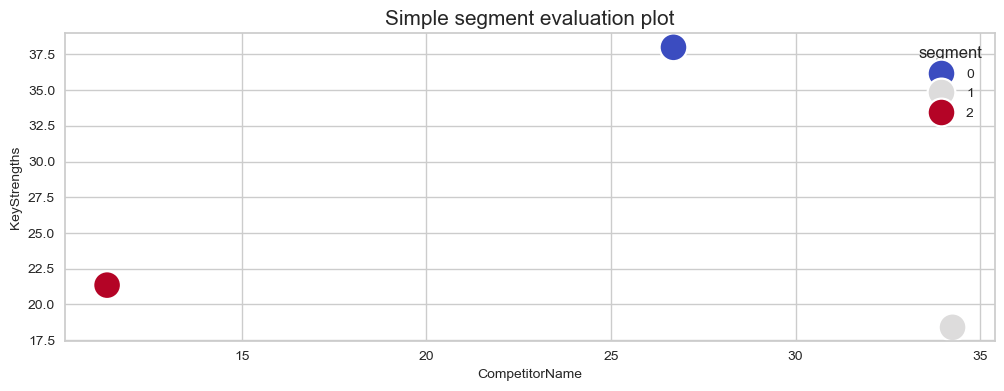

In [346]:
segment = feature.merge(competitor_name, on='Cluster Number', how='left').merge(key_strengths, on='Cluster Number', how='left')
print(segment)
plt.figure(figsize = (12,4))
sns.scatterplot(x="CompetitorName", y="KeyStrengths", data=segment, hue='Cluster Number',s=400, palette='coolwarm')
plt.title("Simple segment evaluation plot", fontsize=15)
plt.xlabel("CompetitorName", fontsize=10)
plt.ylabel("KeyStrengths", fontsize=10)
plt.legend(title='segment')
plt.show()